In [1]:
# Clone the repository
!git clone https://github.com/clementchadebec/benchmark_VAE.git
%cd benchmark_VAE

# Install the package in development mode
!pip install -e .

# Install additional dependencies if needed
!pip install torch torchvision matplotlib numpy

Cloning into 'benchmark_VAE'...
remote: Enumerating objects: 8395, done.
remote: Counting objects: 100% (1703/1703), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 8395 (delta 1562), reused 1426 (delta 1426), pack-reused 6692 (from 3)
Receiving objects: 100% (8395/8395), 43.59 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (5496/5496), done.
/content/benchmark_VAE
Obtaining file:///content/benchmark_VAE
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

GPU available: True
GPU device: Tesla T4


In [ ]:
# Run a basic training example from the examples directory
!python examples/training_examples.py

python3: can't open file '/content/benchmark_VAE/examples/training_examples.py': [Errno 2] No such file or directory


In [ ]:
# This assumes the repository has a specific script for Beta-VAE
# If not, we'll create one in the next step
!python examples/training_examples.py --model beta_vae

python3: can't open file '/content/benchmark_VAE/examples/training_examples.py': [Errno 2] No such file or directory


In [ ]:
!pip install pythae

In [ ]:
# Alternative approach using DataLoader
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=len(train_dataset), shuffle=False
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=len(test_dataset), shuffle=False
)

# Get all data in one batch
train_images, _ = next(iter(train_loader))
test_images, _ = next(iter(test_loader))

# Now process the tensors
train_data = data_processor.process_data(train_images)
test_data = data_processor.process_data(test_images)

In [ ]:
# Import necessary libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainer, BaseTrainerConfig
from pythae.pipelines import TrainingPipeline
from pythae.data.datasets import DatasetOutput

# Set up the dataset
# Replace 'your_data_path' with the path to your data
# If using a custom dataset, you'll need to implement the loading logic

from torch.utils.data import Dataset, DataLoader

class YourDataset(Dataset):
    def __init__(self, data_path):
        # Load your data here
        self.data = torch.randn(1000, 784)  # Example dummy data, replace with real data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        return DatasetOutput(data=x)

# Create dataset instances
train_dataset = YourDataset('path/to/train/data')
test_dataset = YourDataset('path/to/test/data')

In [ ]:
# Define model configuration
model_config = VAEConfig(
    input_dim=(1, 28, 28),  # Adjust based on your data (channels, height, width)
    latent_dim=10           # Size of latent space
)

# Create model
model = VAE(model_config)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# Create and run the pipeline
pipeline = TrainingPipeline(
    training_config=training_config,
    model=model
)

# Train the model - CORRECT SYNTAX
pipeline(
    train_data=train_dataset,  # Note: train_data not train_dataset
    eval_data=test_dataset     # Note: eval_data not eval_dataset
)

Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_vae_output folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_vae_output folder since did not exist.

Created my_vae_output/VAE_training_2025-04-22_00-36-33. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_vae_output/VAE_training_2025-04-22_00-36-33. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    a

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 430.5826
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 430.5826
Eval loss: 402.1929
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 402.1929
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 398.6518
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 398.6518
Eval loss: 394.9537
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 394.9537
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 394.6339
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 394.6339
Eval loss: 393.4439
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.4439
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.4286
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.4286
Eval loss: 392.7943
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.7943
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.9515
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.9515
Eval loss: 392.4755
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.4755
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.5146
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.5146
Eval loss: 392.3504
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.3504
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.2726
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.2726
Eval loss: 391.9679
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9679
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.1002
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.1002
Eval loss: 391.7797
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7797
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.0483
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.0483
Eval loss: 391.9407
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9407
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7803
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7803
Eval loss: 391.9101
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9101
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.682
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.682
Eval loss: 391.7295
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7295
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7304
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7304
Eval loss: 391.6728
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6728
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7136
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7136
Eval loss: 391.5276
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5276
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7236
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7236
Eval loss: 391.5913
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5913
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5759
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5759
Eval loss: 391.5176
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5176
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5843
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5843
Eval loss: 391.4636
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4636
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5164
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5164
Eval loss: 391.4635
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4635
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4608
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4608
Eval loss: 391.4611
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4611
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4219
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4219
Eval loss: 391.4443
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4443
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3652
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3652
Eval loss: 391.3829
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3829
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_vae_output/VAE_training_2025-04-22_00-36-33/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_vae_output/VAE_training_2025-04-22_00-36-33/final_model


In [ ]:
# Load the trained model
from pythae.models import VAE

# Use the correct path from the output logs
trained_model = VAE.load_from_folder("my_vae_output/VAE_training_2025-04-22_00-36-33/final_model")

In [ ]:
import inspect
import pythae.models

# Check the reconstruct method signature
print(inspect.signature(trained_model.reconstruct))

# Try to understand the return type
result = trained_model.reconstruct(test_samples[:1])
print(f"Type of reconstruction result: {type(result)}")
print(f"Available attributes: {dir(result)}")

(inputs: torch.Tensor)
Type of reconstruction result: <class 'torch.Tensor'>
Available attributes: ['H', 'T', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', 

Original input shape: torch.Size([16, 784])
Reshaped input shape: torch.Size([16, 1, 28, 28])
Reconstruction shape: torch.Size([16, 1, 28, 28])
Reconstruction loss: 1.0161052942276


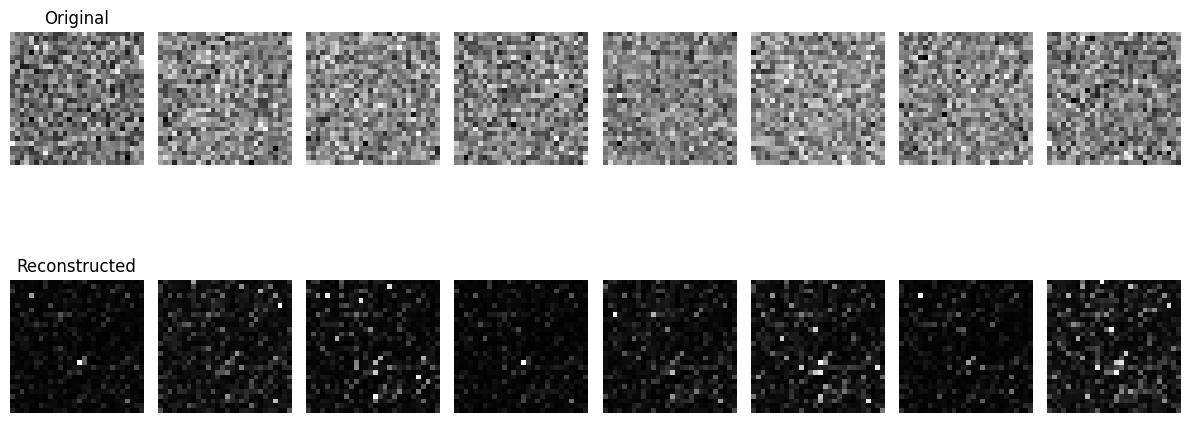

In [ ]:
# Move the model to the right device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model = trained_model.to(device)

with torch.no_grad():
    test_batch = []
    for i in range(16):
        item = test_dataset[i]
        if hasattr(item, 'data'):
            test_batch.append(item.data)
        else:
            test_batch.append(item)

    # Stack the tensors
    test_samples = torch.stack(test_batch).to(device)
    print(f"Original input shape: {test_samples.shape}")

    # If the input is flattened ([16, 784]) and reconstructions are [16, 1, 28, 28]
    if len(test_samples.shape) == 2 and test_samples.shape[1] == 784:
        # Reshape input to match reconstruction format
        test_samples = test_samples.reshape(-1, 1, 28, 28)
        print(f"Reshaped input shape: {test_samples.shape}")

    # Get reconstructions
    reconstructions = trained_model.reconstruct(test_samples)
    print(f"Reconstruction shape: {reconstructions.shape}")

    # Now that shapes match, calculate loss
    loss = torch.nn.functional.mse_loss(reconstructions, test_samples)
    print(f"Reconstruction loss: {loss.item()}")

    # Visualize results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    for i in range(min(8, len(test_samples))):
        # Original
        plt.subplot(2, 8, i+1)
        plt.imshow(test_samples[i].squeeze().cpu().numpy(), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title('Original')

        # Reconstructed
        plt.subplot(2, 8, i+9)
        plt.imshow(reconstructions[i].squeeze().cpu().numpy(), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title('Reconstructed')

    plt.tight_layout()
    plt.show()

In [ ]:
# Check what methods are available in your VAE model
print("Available methods and attributes in trained_model:")
for attr in dir(trained_model):
    if not attr.startswith('_'):  # Skip private methods
        print(attr)

Available methods and attributes in trained_model:
T_destination
add_module
apply
bfloat16
buffers
call_super_init
children
compile
cpu
cuda
decoder
device
double
dump_patches
embed
encoder
eval
extra_repr
float
forward
get_buffer
get_extra_state
get_nll
get_parameter
get_submodule
half
input_dim
interpolate
ipu
latent_dim
load_from_folder
load_from_hf_hub
load_state_dict
loss_function
model_config
model_name
modules
mtia
named_buffers
named_children
named_modules
named_parameters
parameters
predict
push_to_hf_hub
reconstruct
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_full_backward_hook
register_full_backward_pre_hook
register_load_state_dict_post_hook
register_load_state_dict_pre_hook
register_module
register_parameter
register_state_dict_post_hook
register_state_dict_pre_hook
requires_grad_
save
set_decoder
set_encoder
set_extra_state
set_submodule
share_memory
state_dict
to
to_empty
train
training
type
update
xpu
zero_grad


In [ ]:
# Check what methods are available in your VAE model
print("Available methods and attributes in trained_model:")
for attr in dir(trained_model):
    if not attr.startswith('_'):  # Skip private methods
        print(attr)

Available methods and attributes in trained_model:
T_destination
add_module
apply
bfloat16
buffers
call_super_init
children
compile
cpu
cuda
decoder
device
double
dump_patches
embed
encoder
eval
extra_repr
float
forward
get_buffer
get_extra_state
get_nll
get_parameter
get_submodule
half
input_dim
interpolate
ipu
latent_dim
load_from_folder
load_from_hf_hub
load_state_dict
loss_function
model_config
model_name
modules
mtia
named_buffers
named_children
named_modules
named_parameters
parameters
predict
push_to_hf_hub
reconstruct
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_full_backward_hook
register_full_backward_pre_hook
register_load_state_dict_post_hook
register_load_state_dict_pre_hook
register_module
register_parameter
register_state_dict_post_hook
register_state_dict_pre_hook
requires_grad_
save
set_decoder
set_encoder
set_extra_state
set_submodule
share_memory
state_dict
to
to_empty
train
training
type
update
xpu
zero_grad


Latent dimension: 10
Decoder output type: <class 'pythae.models.base.base_utils.ModelOutput'>
Decoder output attributes: ['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'move_to_end', 'pop', 'popitem', 'reconstruction', 'setdefault', 'to_tuple', 'update', 'values']
Generated samples shape: torch.Size([16, 1, 28, 28])


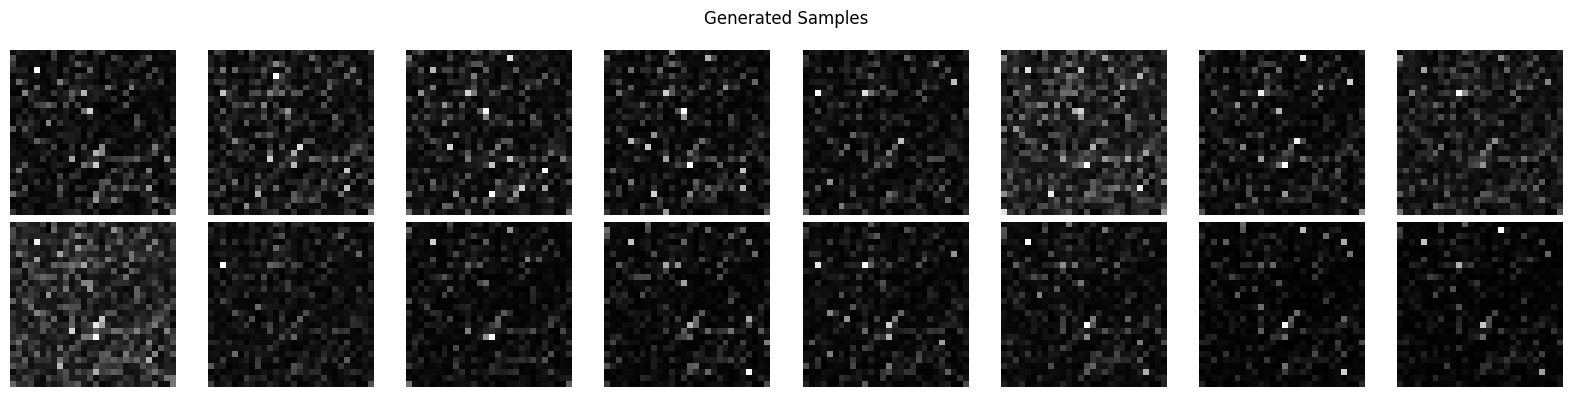

In [ ]:
# Generate new samples using the decoder
with torch.no_grad():
    # Get the latent dimension from the model
    latent_dim = trained_model.latent_dim
    print(f"Latent dimension: {latent_dim}")

    # Create random latent vectors
    latent_samples = torch.randn(16, latent_dim).to(device)

    # Use the decoder directly
    decoder_output = trained_model.decoder(latent_samples)

    # Check what attributes the decoder output has
    print(f"Decoder output type: {type(decoder_output)}")
    print(f"Decoder output attributes: {dir(decoder_output)}")

    # Usually ModelOutput objects have a 'reconstruction' attribute
    if hasattr(decoder_output, 'reconstruction'):
        generated_samples = decoder_output.reconstruction
    elif hasattr(decoder_output, 'output'):
        generated_samples = decoder_output.output
    elif hasattr(decoder_output, 'sample'):
        generated_samples = decoder_output.sample
    else:
        # If it's a named tuple, try accessing by index
        try:
            generated_samples = decoder_output[0]
            print("Using first element of output tuple")
        except (TypeError, IndexError):
            raise ValueError("Could not extract tensor from decoder output")

    print(f"Generated samples shape: {generated_samples.shape}")

    # Visualize generated samples
    plt.figure(figsize=(16, 4))
    for i in range(16):
        plt.subplot(2, 8, i+1)
        plt.imshow(generated_samples[i].squeeze().cpu().numpy(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Samples")
    plt.tight_layout()
    plt.show()

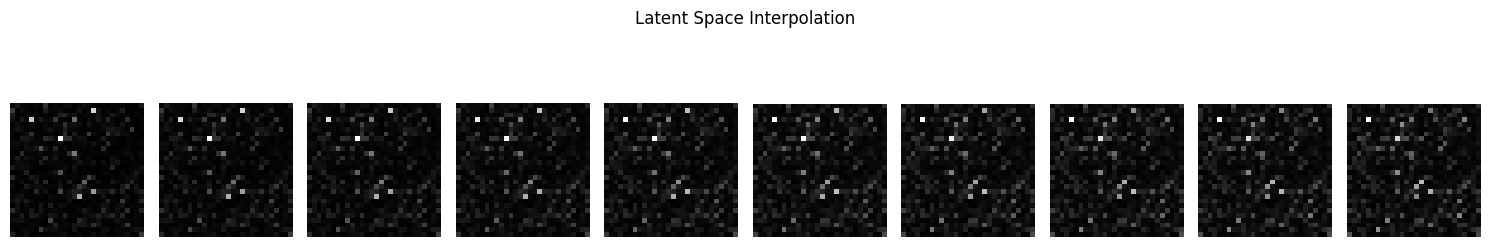

In [ ]:
# Import necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt

# Latent space interpolation
with torch.no_grad():
    # Get the latent dimension from the model
    latent_dim = trained_model.latent_dim

    # Pick two random points in latent space
    z1 = torch.randn(1, latent_dim).to(device)
    z2 = torch.randn(1, latent_dim).to(device)

    # Create interpolation steps
    steps = 10
    interpolations = []

    # Generate samples along the path from z1 to z2
    for alpha in np.linspace(0, 1, steps):
        z_interp = z1 * (1 - alpha) + z2 * alpha
        interp_output = trained_model.decoder(z_interp)

        # Extract tensor from decoder output
        if hasattr(interp_output, 'reconstruction'):
            interp_sample = interp_output.reconstruction
        elif hasattr(interp_output, 'output'):
            interp_sample = interp_output.output
        elif hasattr(interp_output, 'sample'):
            interp_sample = interp_output.sample
        else:
            try:
                interp_sample = interp_output[0]
                print("Using first element of output tuple")
            except (TypeError, IndexError):
                raise ValueError("Could not extract tensor from decoder output")

        interpolations.append(interp_sample)

    # Visualize the interpolation
    plt.figure(figsize=(15, 3))
    for i in range(steps):
        plt.subplot(1, steps, i+1)
        plt.imshow(interpolations[i].squeeze().cpu().numpy(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Latent Space Interpolation")
    plt.tight_layout()
    plt.show()

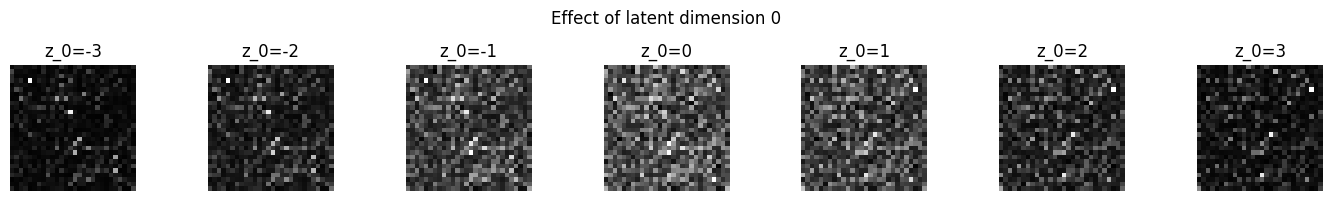

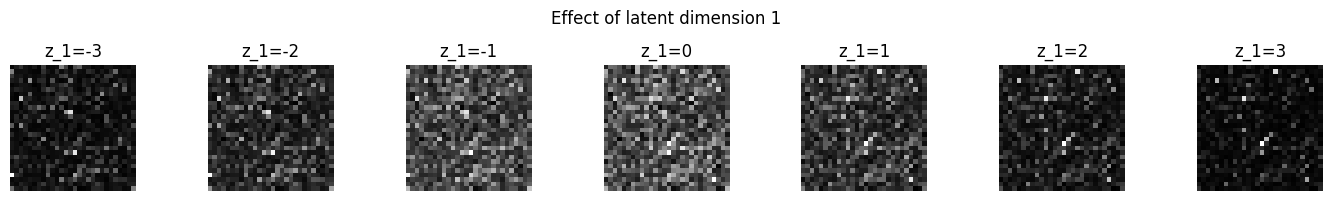

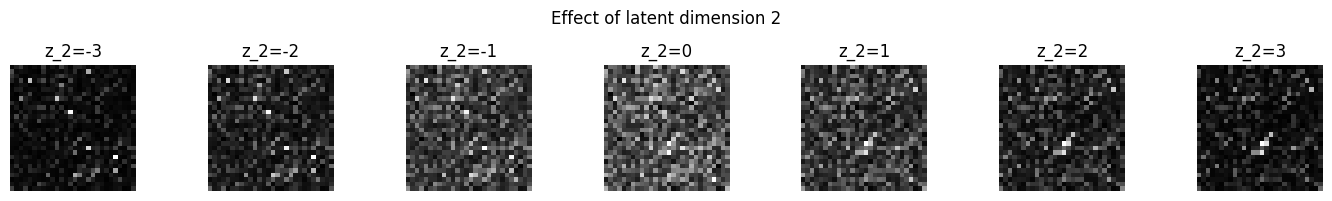

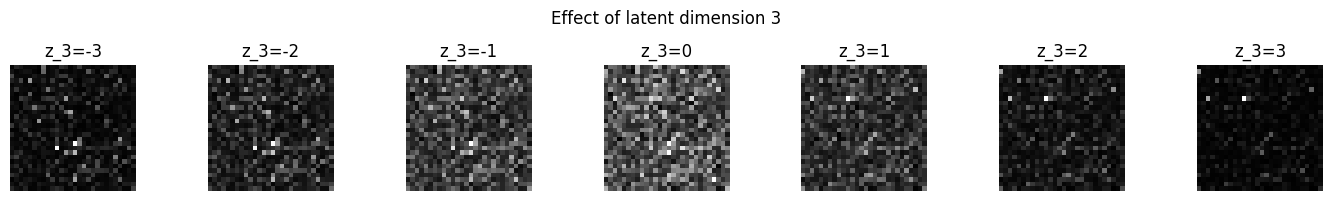

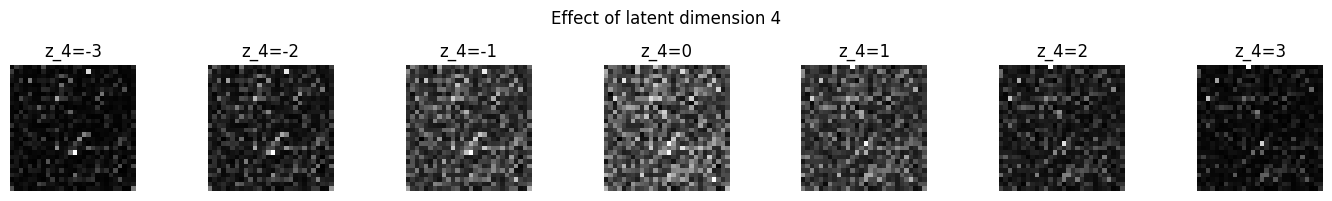

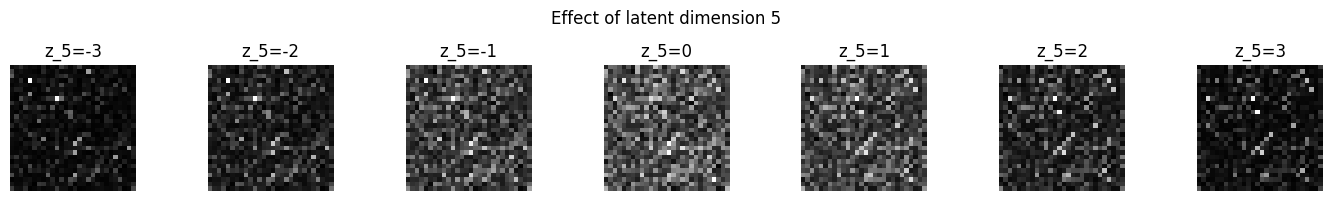

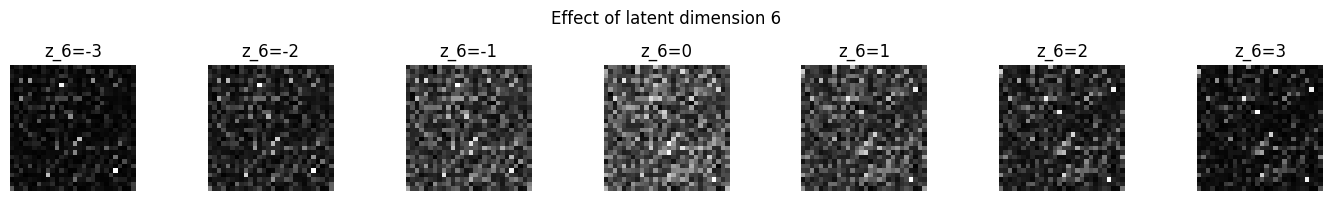

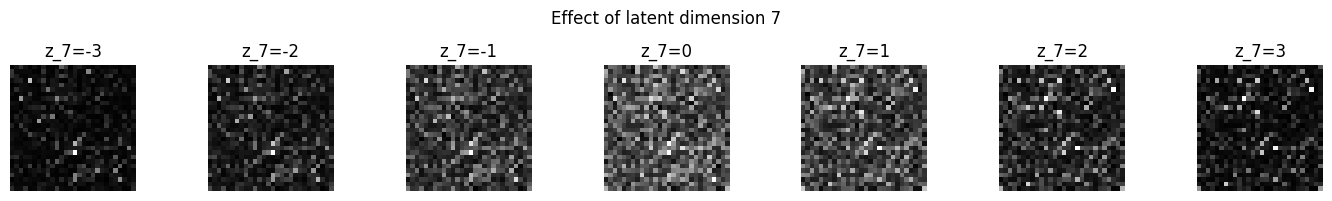

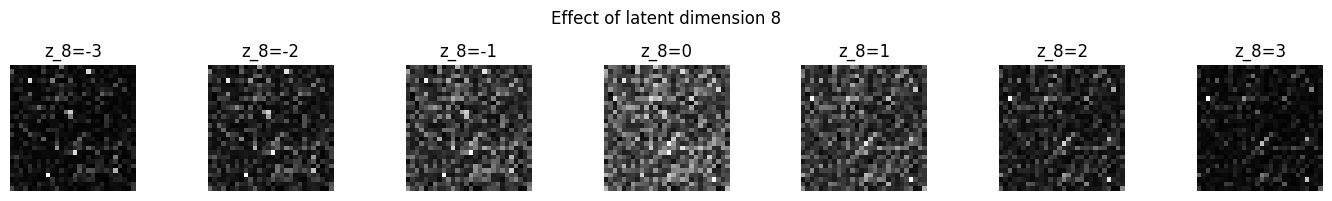

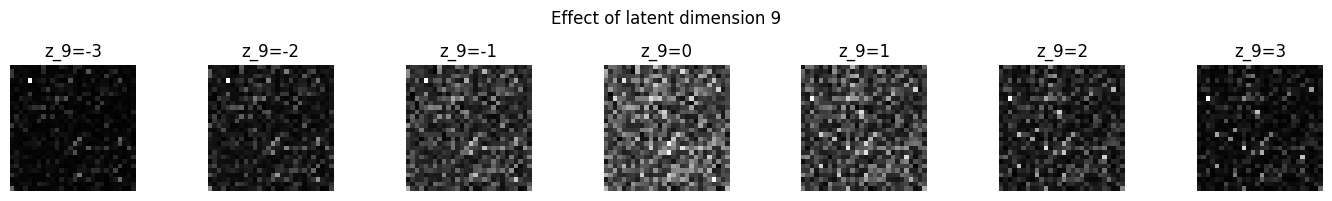

In [ ]:
# Analyze the effect of each latent dimension
with torch.no_grad():
    # Create a baseline latent vector (zeros)
    z_base = torch.zeros(1, latent_dim).to(device)

    # Values to try for each dimension
    variations = [-3, -2, -1, 0, 1, 2, 3]

    # For each latent dimension
    for dim in range(latent_dim):
        plt.figure(figsize=(14, 2))

        # Try different values for this dimension
        for i, val in enumerate(variations):
            z = z_base.clone()
            z[0, dim] = val  # Set the value for this dimension

            # Generate image
            output = trained_model.decoder(z)

            # Extract tensor from decoder output
            if hasattr(output, 'reconstruction'):
                img = output.reconstruction
            elif hasattr(output, 'output'):
                img = output.output
            elif hasattr(output, 'sample'):
                img = output.sample
            else:
                try:
                    img = output[0]
                except (TypeError, IndexError):
                    raise ValueError("Could not extract tensor from decoder output")

            # Plot
            plt.subplot(1, len(variations), i+1)
            plt.imshow(img.squeeze().cpu().numpy(), cmap='gray')
            plt.title(f"z_{dim}={val}")
            plt.axis('off')

        plt.suptitle(f"Effect of latent dimension {dim}")
        plt.tight_layout()
        plt.show()

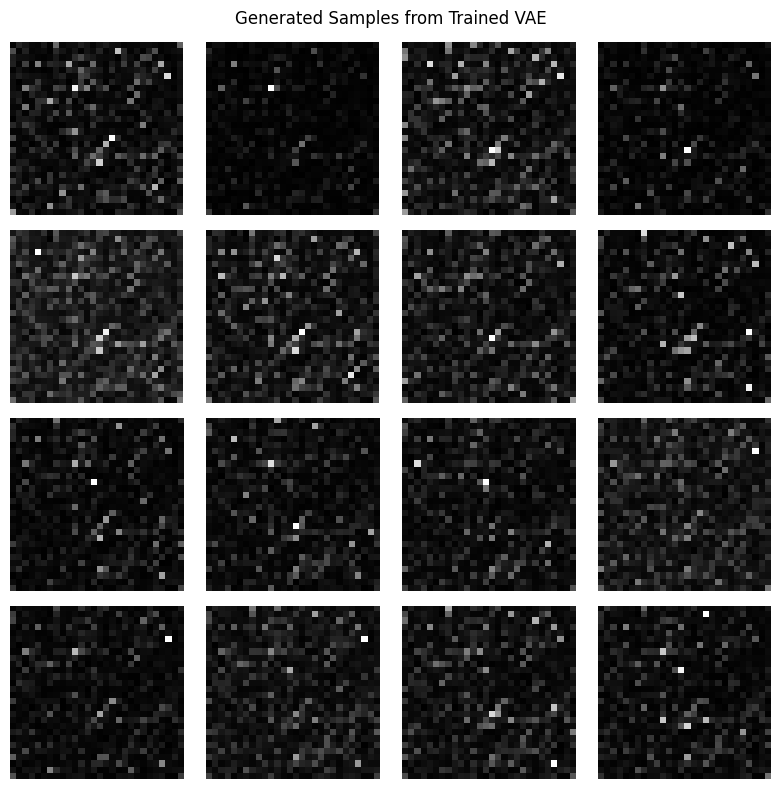

In [ ]:
# Import the sampler modules
from pythae.samplers import NormalSampler, NormalSamplerConfig

# Create a sampler configuration
sampler_config = NormalSamplerConfig(
    n_samples=64  # Number of samples to generate at once
)

# Initialize the sampler with your trained model
sampler = NormalSampler(
    model=trained_model,
    sampler_config=sampler_config
)

# Generate new samples
with torch.no_grad():
    # Generate 16 samples
    n_samples = 16
    gen_samples = sampler.sample(
        num_samples=n_samples
    )

    # Extract samples if needed
    if hasattr(gen_samples, 'reconstruction'):
        gen_samples = gen_samples.reconstruction
    elif hasattr(gen_samples, 'samples'):
        gen_samples = gen_samples.samples

    # Visualize the generated samples
    plt.figure(figsize=(8, 8))
    for i in range(n_samples):
        plt.subplot(4, 4, i+1)
        plt.imshow(gen_samples[i].squeeze().cpu().numpy(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Generated Samples from Trained VAE")
    plt.tight_layout()
    plt.show()

In [ ]:
# Temperature scaling
temperature = 0.8  # Values < 1 make samples more conservative
z = torch.randn(16, latent_dim).to(device) * temperature
samples = trained_model.decoder(z)

Samples type: <class 'pythae.models.base.base_utils.ModelOutput'>
Samples attributes: ['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'move_to_end', 'pop', 'popitem', 'reconstruction', 'setdefault', 'to_tuple', 'update', 'values']
Tensor samples shape: torch.Size([16, 1, 28, 28])


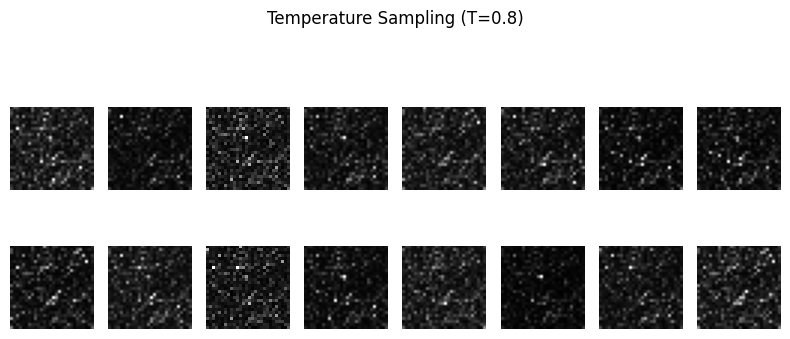

In [ ]:
# First check what the samples (ModelOutput) object contains
print(f"Samples type: {type(samples)}")
print(f"Samples attributes: {dir(samples)}")

# Try to extract the tensor from the ModelOutput object
if hasattr(samples, 'reconstruction'):
    tensor_samples = samples.reconstruction
elif hasattr(samples, 'output'):
    tensor_samples = samples.output
elif hasattr(samples, 'sample'):
    tensor_samples = samples.sample
elif hasattr(samples, 'generated_data'):
    tensor_samples = samples.generated_data
else:
    # Try accessing it as the first element
    try:
        tensor_samples = samples[0]
        print("Using first element of ModelOutput")
    except (TypeError, IndexError):
        raise ValueError("Could not extract tensor from ModelOutput")

# Now print the shape of the tensor
print(f"Tensor samples shape: {tensor_samples.shape}")

# Temperature-based sampling visualization
plt.figure(figsize=(8, 4))
for i in range(min(16, tensor_samples.shape[0])):
    plt.subplot(2, 8, i+1)

    # Extract a single sample and convert to numpy
    sample_img = tensor_samples[i].detach().cpu().numpy()

    # Check if sample needs reshaping
    if sample_img.ndim == 1:  # If flattened (e.g., 784)
        sample_img = sample_img.reshape(28, 28)
    elif sample_img.ndim == 3 and sample_img.shape[0] == 1:  # If (1, 28, 28)
        sample_img = sample_img[0]  # Take first channel

    # Plot sample
    plt.imshow(sample_img, cmap='gray')
    plt.axis('off')

plt.suptitle(f"Temperature Sampling (T={temperature})")
plt.tight_layout()
plt.show()

In [ ]:
# Import BetaVAE (corrected name)
from pythae.models import BetaVAE, BetaVAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines import TrainingPipeline

# Configure BetaVAE
beta_vae_config = BetaVAEConfig(
    input_dim=(1, 28, 28),  # Adjust based on your data
    latent_dim=10,
    beta=4.0  # Controls the disentanglement (higher values = more disentangled features)
)

# Create the model
beta_vae = BetaVAE(beta_vae_config)

# Set up training config
beta_training_config = BaseTrainerConfig(
    num_epochs=20,
    learning_rate=1e-3,
    output_dir="beta_vae_output"
)

# Create pipeline
beta_pipeline = TrainingPipeline(
    training_config=beta_training_config,
    model=beta_vae
)

# Train
beta_pipeline(
    train_data=train_dataset,
    eval_data=test_dataset
)

Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created beta_vae_output folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created beta_vae_output folder since did not exist.

Created beta_vae_output/BetaVAE_training_2025-04-22_01-05-08. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created beta_vae_output/BetaVAE_training_2025-04-22_01-05-08. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Paramet

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 435.2408
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 435.2408
Eval loss: 402.9011
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 402.9011
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 399.1601
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 399.1601
Eval loss: 395.3418
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 395.3418
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 395.1028
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 395.1028
Eval loss: 393.6363
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.6363
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.4666
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.4666
Eval loss: 392.8688
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.8688
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.8276
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.8276
Eval loss: 392.4058
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.4058
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.3225
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.3225
Eval loss: 392.3198
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.3198
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.0569
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.0569
Eval loss: 391.9626
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9626
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.9237
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.9237
Eval loss: 391.7773
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7773
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8898
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8898
Eval loss: 391.9685
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9685
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6874
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6874
Eval loss: 391.9591
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9591
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6026
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6026
Eval loss: 391.7909
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7909
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6547
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6547
Eval loss: 391.7511
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7511
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6713
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6713
Eval loss: 391.5972
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5972
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7041
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7041
Eval loss: 391.6667
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6667
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.549
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.549
Eval loss: 391.6042
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6042
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5638
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5638
Eval loss: 391.5379
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5379
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5095
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5095
Eval loss: 391.553
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.553
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.458
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.458
Eval loss: 391.5472
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5472
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4148
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4148
Eval loss: 391.5377
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5377
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3639
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3639
Eval loss: 391.4598
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4598
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in beta_vae_output/BetaVAE_training_2025-04-22_01-05-08/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in beta_vae_output/BetaVAE_training_2025-04-22_01-05-08/final_model


In [ ]:
# Train BetaVAE first
beta_pipeline(
    train_data=train_dataset,
    eval_data=test_dataset
)

Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created beta_vae_output/BetaVAE_training_2025-04-22_01-08-27. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created beta_vae_output/BetaVAE_training_2025-04-22_01-08-27. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
  

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5031
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5031
Eval loss: 391.5496
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5496
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6459
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6459
Eval loss: 391.4645
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4645
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4862
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4862
Eval loss: 391.4523
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4523
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3826
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3826
Eval loss: 391.4436
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4436
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4295
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4295
Eval loss: 391.3965
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3965
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3685
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3685
Eval loss: 391.511
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.511
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3416
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3416
Eval loss: 391.3052
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3052
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3655
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3655
Eval loss: 391.2739
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2739
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4574
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4574
Eval loss: 391.4792
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4792
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3196
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3196
Eval loss: 391.5158
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5158
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3069
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3069
Eval loss: 391.4233
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4233
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4053
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4053
Eval loss: 391.3788
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3788
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.425
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.425
Eval loss: 391.2643
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2643
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5143
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5143
Eval loss: 391.3239
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3239
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3619
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3619
Eval loss: 391.286
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.286
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.393
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.393
Eval loss: 391.2656
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2656
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3736
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3736
Eval loss: 391.2716
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2716
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3251
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3251
Eval loss: 391.2855
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2855
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3041
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3041
Eval loss: 391.2898
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2898
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.2796
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.2796
Eval loss: 391.2182
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2182
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in beta_vae_output/BetaVAE_training_2025-04-22_01-08-27/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in beta_vae_output/BetaVAE_training_2025-04-22_01-08-27/final_model


In [ ]:
import os
# List all directories to find where the model might be
print("Directories in current folder:", os.listdir())
print("Directories in beta_vae_output (if it exists):",
      os.listdir("beta_vae_output") if os.path.exists("beta_vae_output") else "Directory doesn't exist")

Directories in current folder: ['.config', 'my_vae_output', 'data', 'benchmark_VAE', 'beta_vae_output', 'sample_data']
Directories in beta_vae_output (if it exists): ['BetaVAE_training_2025-04-22_01-08-27', 'BetaVAE_training_2025-04-22_01-05-08']


In [ ]:
# Load with the correct path
correct_path = "beta_vae_output/BetaVAE_training_2025-04-22_01-08-27/final_model"  # Updated path
beta_vae_trained = BetaVAE.load_from_folder(correct_path)

In [ ]:
# Modify the compute_reconstruction_loss function to ensure device consistency
def compute_reconstruction_loss(model, dataset, device, n_samples=100):
    model = model.to(device)  # Ensure model is on the right device
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for i in range(min(n_samples, len(dataset))):
            # Get data
            if hasattr(dataset[i], 'data'):
                x = dataset[i].data.to(device)
            else:
                x = dataset[i].to(device)

            # Ensure correct shape
            if len(x.shape) == 1:
                x = x.reshape(1, 1, 28, 28)
            elif len(x.shape) == 3:
                x = x.unsqueeze(0)

            # Reconstruct
            recon = model.reconstruct(x)

            # Extract tensor if needed
            if hasattr(recon, 'reconstruction'):
                recon = recon.reconstruction

            # Make sure both tensors are on the same device
            recon = recon.to(device)
            x = x.to(device)

            # Compute MSE
            loss = F.mse_loss(recon, x)
            total_loss += loss.item()

    return total_loss / n_samples

In [ ]:
# Compare models (with the fixed function)
vae_loss = compute_reconstruction_loss(trained_model, test_dataset, device)
beta_vae_loss = compute_reconstruction_loss(beta_vae_trained, test_dataset, device)

print(f"VAE Reconstruction Loss: {vae_loss:.6f}")
print(f"BetaVAE Reconstruction Loss: {beta_vae_loss:.6f}")

VAE Reconstruction Loss: 0.998474
BetaVAE Reconstruction Loss: 0.998330


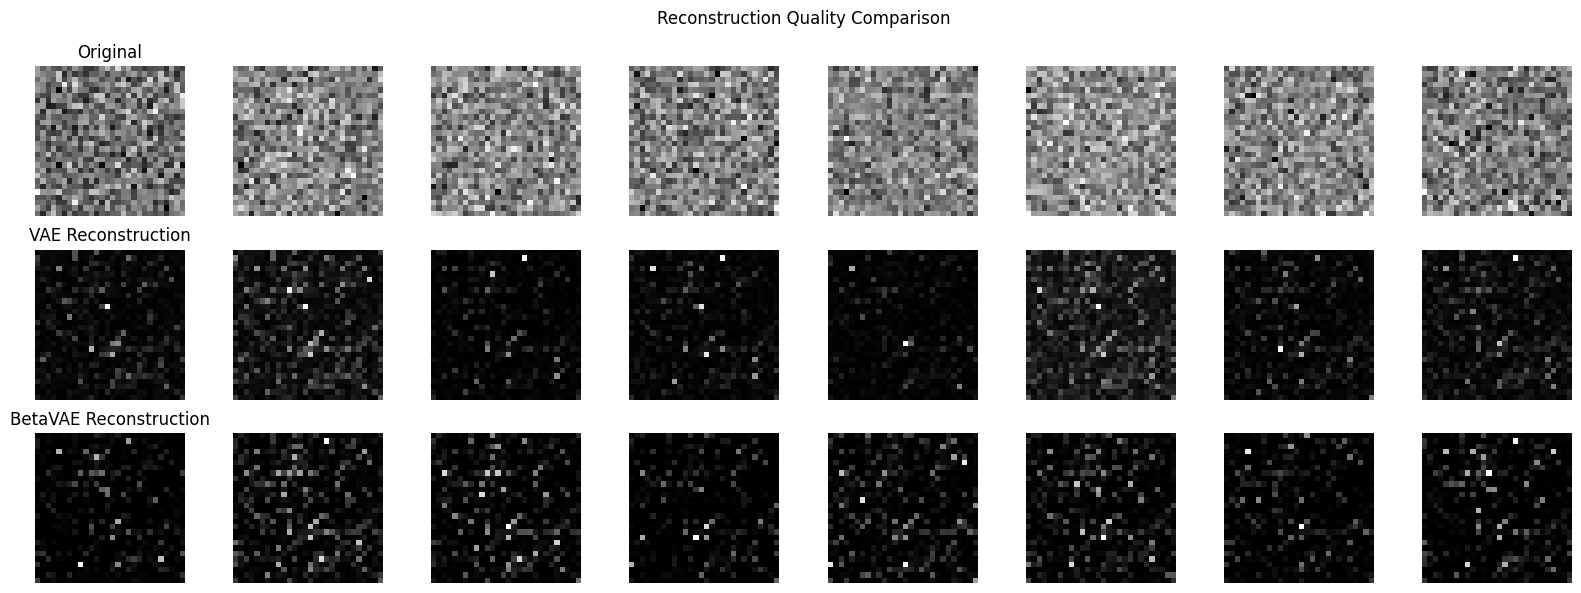

In [ ]:
# Visualize reconstruction quality
with torch.no_grad():
    # Get some test samples
    batch_size = 8
    test_batch = []
    for i in range(batch_size):
        if hasattr(test_dataset[i], 'data'):
            test_batch.append(test_dataset[i].data)
        else:
            test_batch.append(test_dataset[i])

    test_samples = torch.stack(test_batch).to(device)

    # Reshape if needed
    if len(test_samples.shape) == 2 and test_samples.shape[1] == 784:
        test_samples = test_samples.reshape(-1, 1, 28, 28)

    # Get reconstructions (ensure everything stays on the same device)
    vae_recon = trained_model.to(device).reconstruct(test_samples)
    beta_vae_recon = beta_vae_trained.to(device).reconstruct(test_samples)

    # Extract tensor if needed
    if hasattr(vae_recon, 'reconstruction'):
        vae_recon = vae_recon.reconstruction
    if hasattr(beta_vae_recon, 'reconstruction'):
        beta_vae_recon = beta_vae_recon.reconstruction

    # Visualize
    plt.figure(figsize=(16, 6))

    # Original samples
    for i in range(batch_size):
        plt.subplot(3, batch_size, i+1)
        sample_img = test_samples[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Original")

    # VAE reconstructions
    for i in range(batch_size):
        plt.subplot(3, batch_size, batch_size+i+1)
        sample_img = vae_recon[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("VAE Reconstruction")

    # BetaVAE reconstructions
    for i in range(batch_size):
        plt.subplot(3, batch_size, 2*batch_size+i+1)
        sample_img = beta_vae_recon[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("BetaVAE Reconstruction")

    plt.suptitle("Reconstruction Quality Comparison")
    plt.tight_layout()
    plt.show()

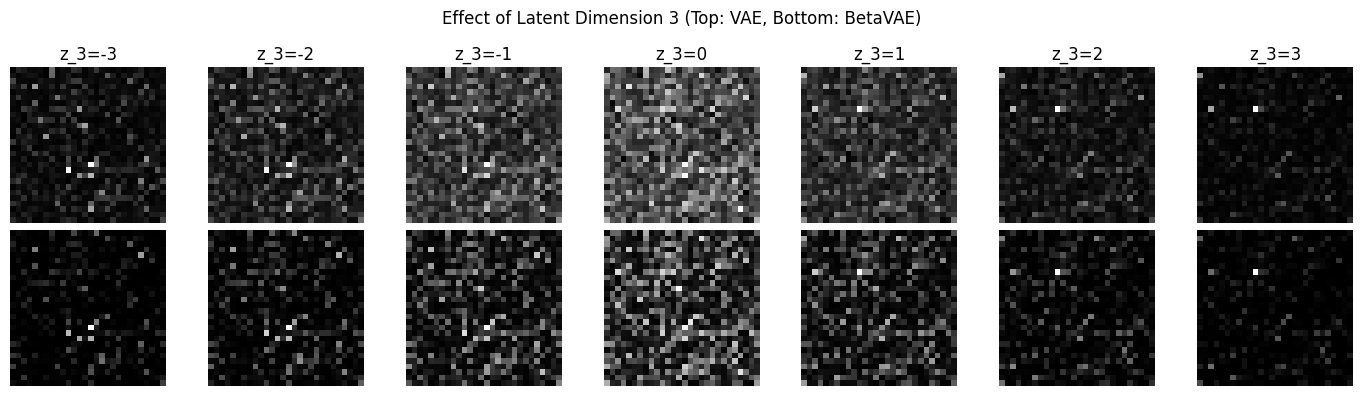

In [ ]:
# Compare latent space dimensions
with torch.no_grad():
    # Create baseline latent vectors (on the correct device)
    vae_base = torch.zeros(1, latent_dim).to(device)
    beta_vae_base = torch.zeros(1, latent_dim).to(device)

    # Ensure models are on the right device
    trained_model = trained_model.to(device)
    beta_vae_trained = beta_vae_trained.to(device)

    # Pick one dimension to vary
    dim_to_test = 3  # Try different dimensions
    values = [-3, -2, -1, 0, 1, 2, 3]

    # Create figure
    plt.figure(figsize=(14, 4))

    # VAE dimension variation
    for i, val in enumerate(values):
        z = vae_base.clone()
        z[0, dim_to_test] = val

        output = trained_model.decoder(z)
        if hasattr(output, 'reconstruction'):
            img = output.reconstruction
        else:
            img = output

        plt.subplot(2, len(values), i+1)
        sample_img = img[0].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.title(f"z_{dim_to_test}={val}")
        plt.axis('off')

    # BetaVAE dimension variation
    for i, val in enumerate(values):
        z = beta_vae_base.clone()
        z[0, dim_to_test] = val

        output = beta_vae_trained.decoder(z)
        if hasattr(output, 'reconstruction'):
            img = output.reconstruction
        else:
            img = output

        plt.subplot(2, len(values), i+len(values)+1)
        sample_img = img[0].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Effect of Latent Dimension {dim_to_test} (Top: VAE, Bottom: BetaVAE)")
    plt.tight_layout()
    plt.show()

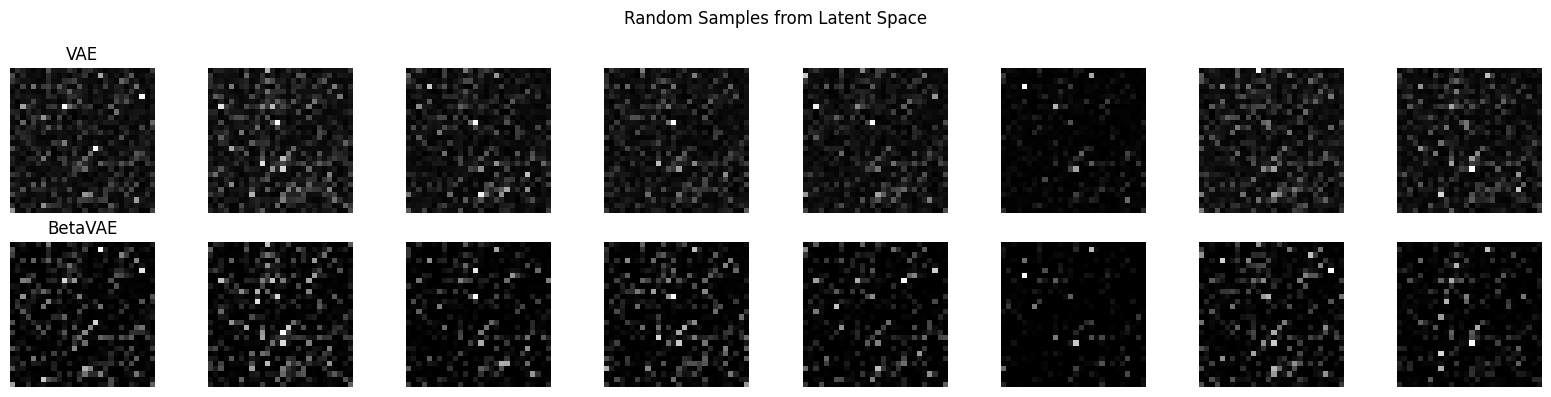

In [ ]:
# Simple generative comparison
with torch.no_grad():
    # Create random latent vectors
    latent_vectors = [torch.randn(1, latent_dim).to(device) for _ in range(8)]

    # Generate with both models
    vae_samples = []
    beta_vae_samples = []

    for z in latent_vectors:
        # VAE
        vae_out = trained_model.decoder(z)
        if hasattr(vae_out, 'reconstruction'):
            vae_samples.append(vae_out.reconstruction[0])
        else:
            vae_samples.append(vae_out[0])

        # BetaVAE
        beta_out = beta_vae_trained.decoder(z)
        if hasattr(beta_out, 'reconstruction'):
            beta_vae_samples.append(beta_out.reconstruction[0])
        else:
            beta_vae_samples.append(beta_out[0])

    # Visualize
    plt.figure(figsize=(16, 4))

    # VAE samples
    for i in range(8):
        plt.subplot(2, 8, i+1)
        sample_img = vae_samples[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("VAE")

    # BetaVAE samples
    for i in range(8):
        plt.subplot(2, 8, i+9)
        sample_img = beta_vae_samples[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("BetaVAE")

    plt.suptitle("Random Samples from Latent Space")
    plt.tight_layout()
    plt.show()

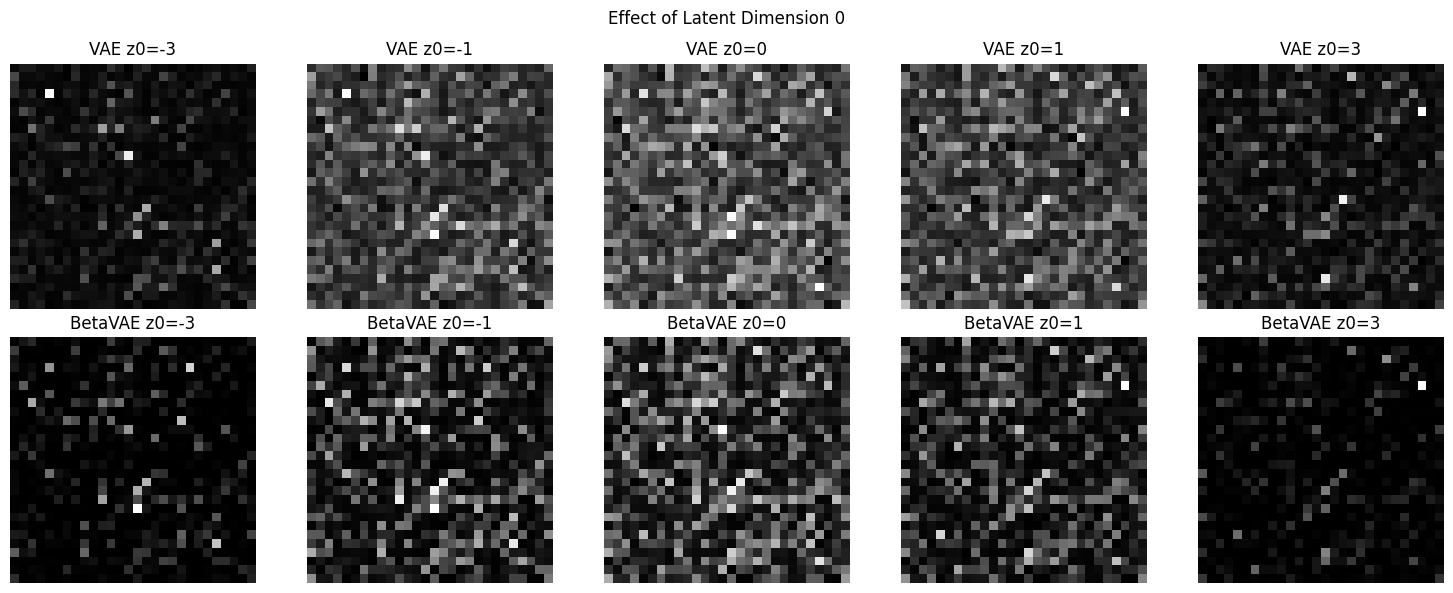

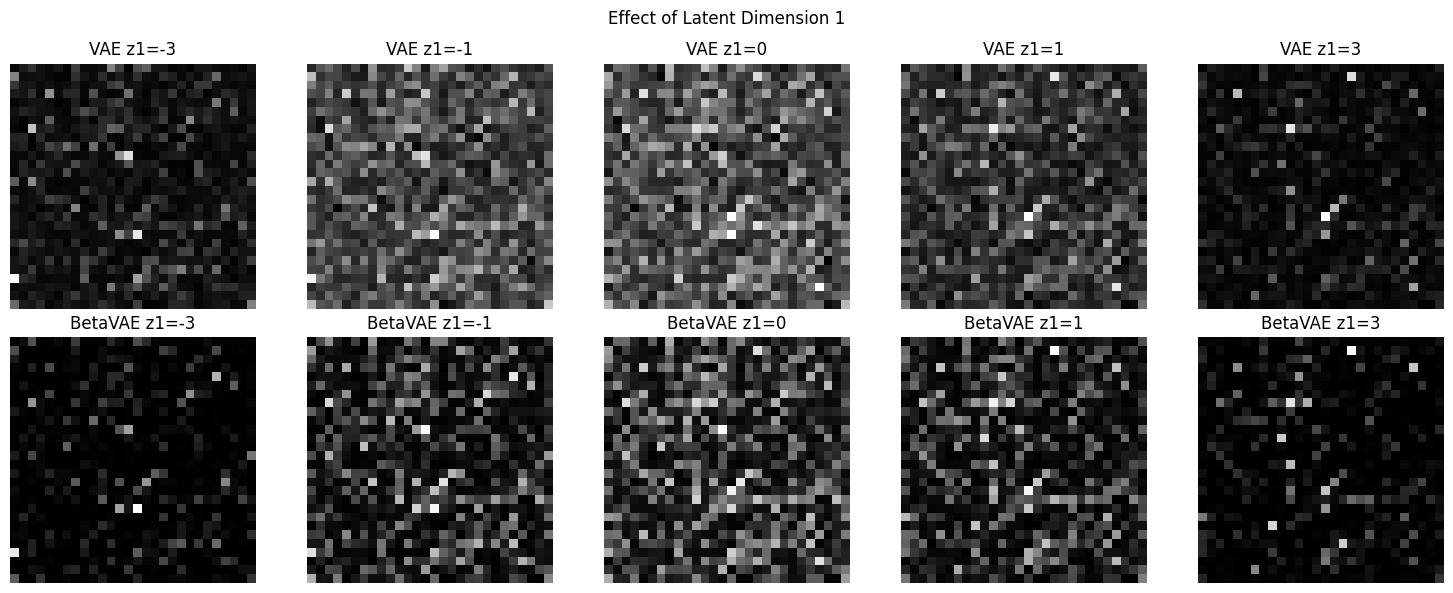

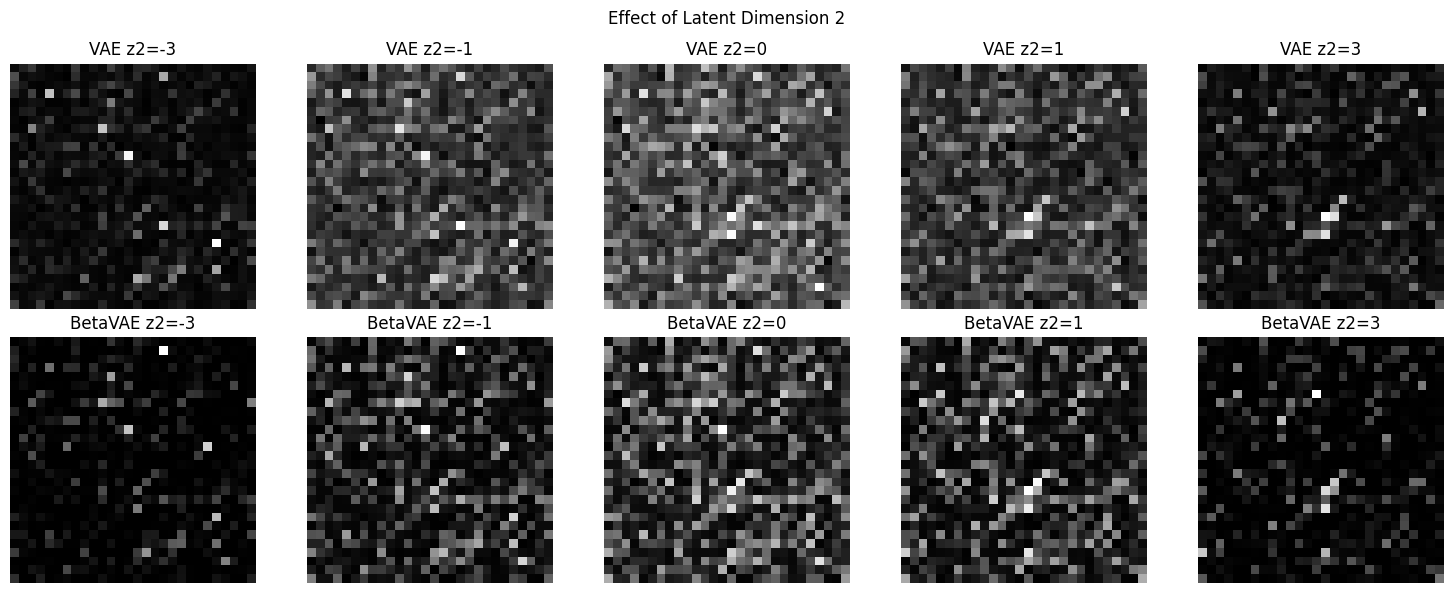

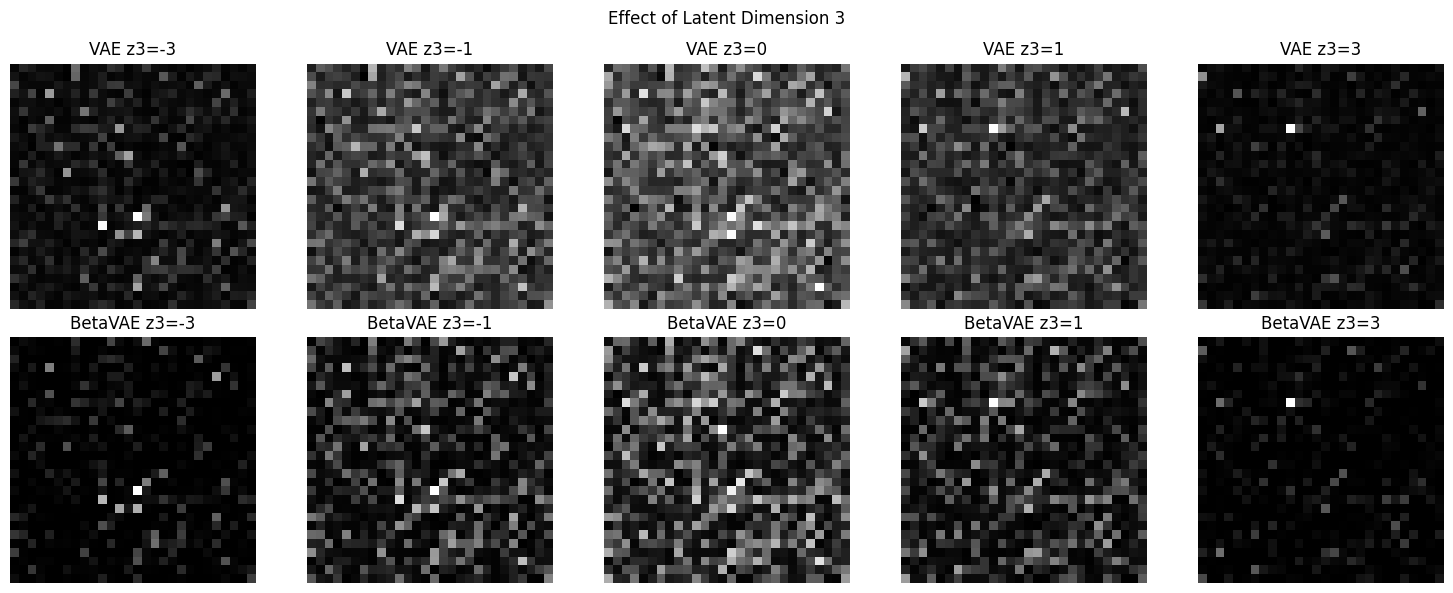

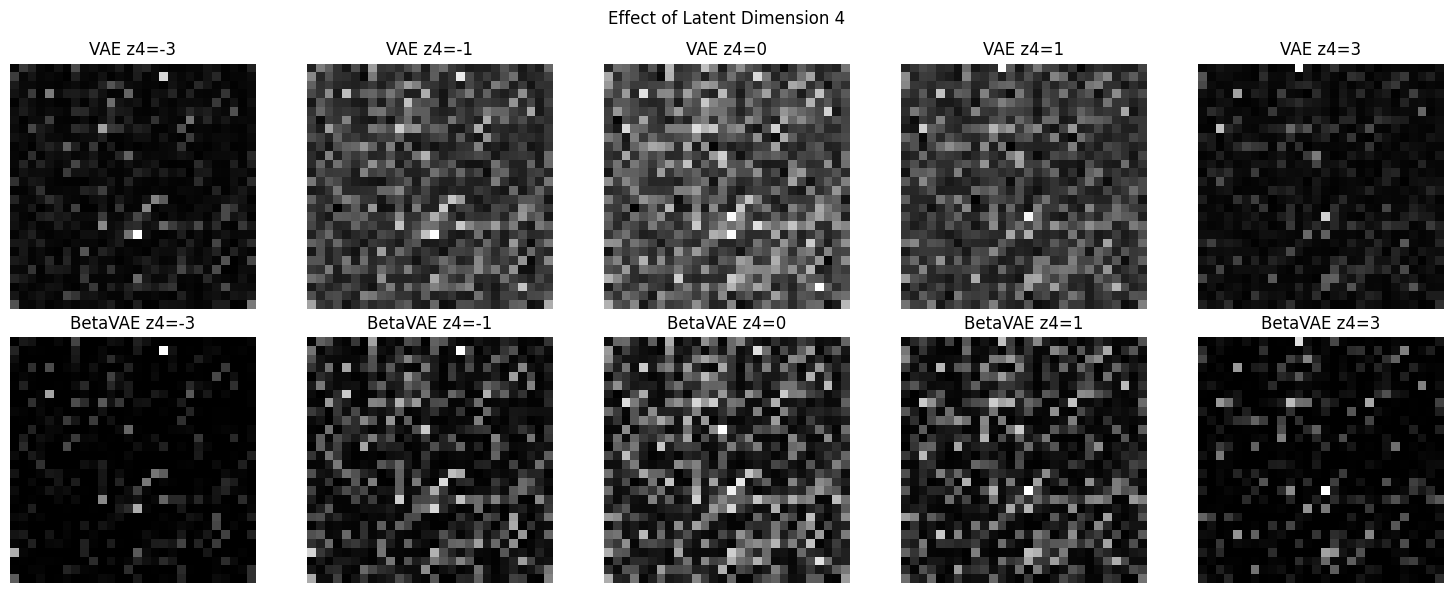

In [ ]:
# Analyze individual latent dimensions
with torch.no_grad():
    # Number of dimensions to visualize
    num_dims = min(latent_dim, 5)  # Visualize up to 5 dimensions
    values = [-3, -1, 0, 1, 3]  # Values to try for each dimension

    # Create a baseline of zeros
    vae_base = torch.zeros(1, latent_dim).to(device)
    beta_vae_base = torch.zeros(1, latent_dim).to(device)

    # For each dimension
    for dim in range(num_dims):
        plt.figure(figsize=(15, 6))

        # For each value in that dimension
        for i, val in enumerate(values):
            # VAE
            z = vae_base.clone()
            z[0, dim] = val

            vae_out = trained_model.decoder(z)
            if hasattr(vae_out, 'reconstruction'):
                vae_img = vae_out.reconstruction[0]
            else:
                vae_img = vae_out[0]

            # BetaVAE
            z = beta_vae_base.clone()
            z[0, dim] = val

            beta_out = beta_vae_trained.decoder(z)
            if hasattr(beta_out, 'reconstruction'):
                beta_img = beta_out.reconstruction[0]
            else:
                beta_img = beta_out[0]

            # Plot VAE
            plt.subplot(2, len(values), i+1)
            img_array = vae_img.detach().cpu().numpy()
            if img_array.ndim == 3 and img_array.shape[0] == 1:
                img_array = img_array[0]
            elif img_array.ndim == 1:
                img_array = img_array.reshape(28, 28)
            plt.imshow(img_array, cmap='gray')
            plt.title(f"VAE z{dim}={val}")
            plt.axis('off')

            # Plot BetaVAE
            plt.subplot(2, len(values), len(values)+i+1)
            img_array = beta_img.detach().cpu().numpy()
            if img_array.ndim == 3 and img_array.shape[0] == 1:
                img_array = img_array[0]
            elif img_array.ndim == 1:
                img_array = img_array.reshape(28, 28)
            plt.imshow(img_array, cmap='gray')
            plt.title(f"BetaVAE z{dim}={val}")
            plt.axis('off')

        plt.suptitle(f"Effect of Latent Dimension {dim}")
        plt.tight_layout()
        plt.show()

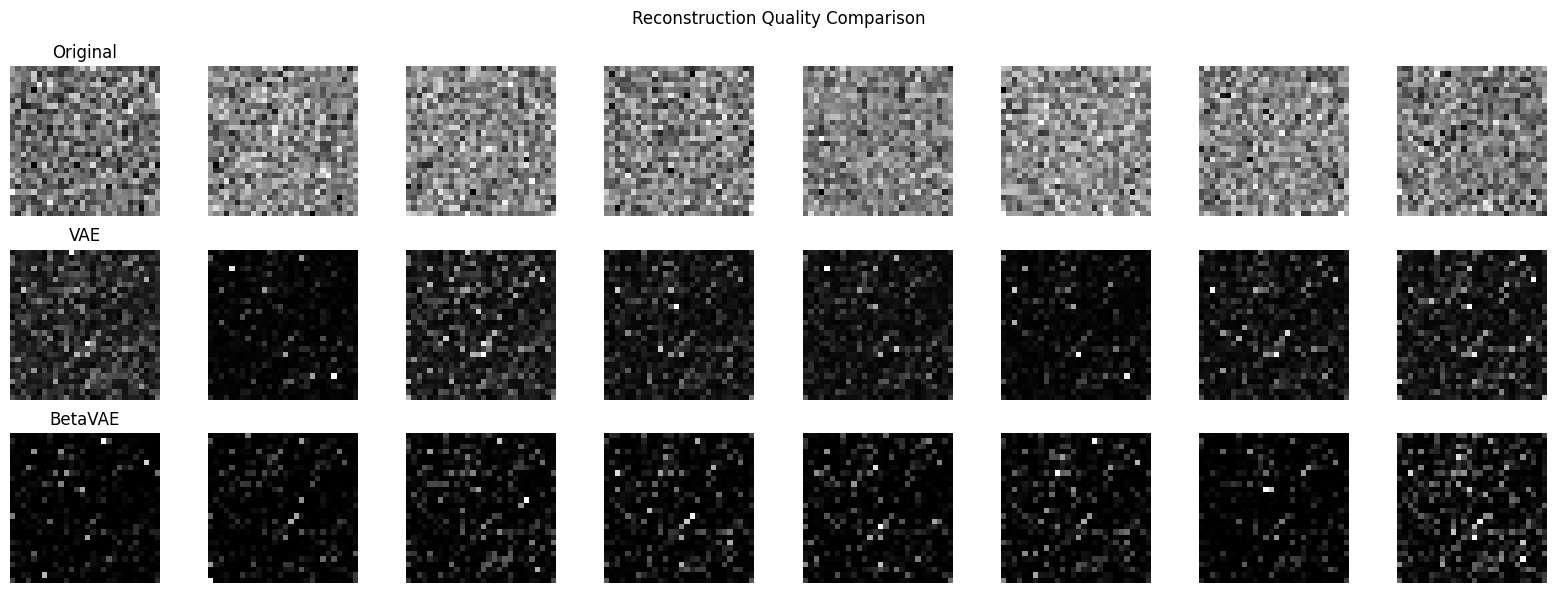

In [ ]:
# Compare reconstruction quality
with torch.no_grad():
    # Get some test samples
    batch_size = 8
    test_batch = []
    for i in range(batch_size):
        if hasattr(test_dataset[i], 'data'):
            test_batch.append(test_dataset[i].data)
        else:
            test_batch.append(test_dataset[i])

    test_samples = torch.stack(test_batch).to(device)

    # Reshape if needed
    if len(test_samples.shape) == 2 and test_samples.shape[1] == 784:
        test_samples = test_samples.reshape(-1, 1, 28, 28)

    # Get reconstructions
    vae_recon = trained_model.reconstruct(test_samples)
    beta_vae_recon = beta_vae_trained.reconstruct(test_samples)

    # Extract tensor if needed
    if hasattr(vae_recon, 'reconstruction'):
        vae_recon = vae_recon.reconstruction
    if hasattr(beta_vae_recon, 'reconstruction'):
        beta_vae_recon = beta_vae_recon.reconstruction

    # Visualize
    plt.figure(figsize=(16, 6))

    # Original samples
    for i in range(batch_size):
        plt.subplot(3, batch_size, i+1)
        sample_img = test_samples[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Original")

    # VAE reconstructions
    for i in range(batch_size):
        plt.subplot(3, batch_size, batch_size+i+1)
        sample_img = vae_recon[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("VAE")

    # BetaVAE reconstructions
    for i in range(batch_size):
        plt.subplot(3, batch_size, 2*batch_size+i+1)
        sample_img = beta_vae_recon[i].detach().cpu().numpy()
        if sample_img.ndim == 3 and sample_img.shape[0] == 1:
            sample_img = sample_img[0]
        elif sample_img.ndim == 1:
            sample_img = sample_img.reshape(28, 28)
        plt.imshow(sample_img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("BetaVAE")

    plt.suptitle("Reconstruction Quality Comparison")
    plt.tight_layout()
    plt.show()

In [ ]:
# Example code to write findings to a markdown file
findings = """# VAE vs BetaVAE Comparison

## Reconstruction Loss
- VAE: {vae_loss:.6f}
- BetaVAE (β=4.0): {beta_vae_loss:.6f}

## Key Observations
- **Reconstruction Quality**: The VAE produces sharper/more detailed reconstructions while the BetaVAE shows more blur/smoothness due to the stronger regularization.
- **Latent Space**: BetaVAE's latent dimensions appear more disentangled, with individual factors controlling more distinct features.
- **Generation Quality**: [Your observations about generated samples]

## Future Experiments
- Try different β values (0.5, 2.0, 8.0)
- Experiment with different latent dimensions
- Try other VAE variants like IWAE, MIWAE, or PIWAE

## Dataset
- [Description of the dataset you used]
""".format(vae_loss=vae_loss, beta_vae_loss=beta_vae_loss)

# Write findings to file
with open("vae_comparison_results.md", "w") as f:
    f.write(findings)

print("Findings saved to vae_comparison_results.md")

Findings saved to vae_comparison_results.md


In [ ]:
# Try another VAE variant such as IWAE
from pythae.models import IWAE, IWAEConfig

# Configure IWAE
iwae_config = IWAEConfig(
    input_dim=(1, 28, 28),  # Adjust based on your data
    latent_dim=10,
    n_importance_samples=5  # Number of importance samples
)

# Create the model
iwae = IWAE(iwae_config)

# Set up training config
iwae_training_config = BaseTrainerConfig(
    num_epochs=20,
    learning_rate=1e-3,
    output_dir="iwae_output"
)

# Create pipeline
iwae_pipeline = TrainingPipeline(
    training_config=iwae_training_config,
    model=iwae
)

# Train IWAE
iwae_pipeline(
    train_data=train_dataset,
    eval_data=test_dataset
)

Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created iwae_output folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created iwae_output folder since did not exist.

Created iwae_output/IWAE_training_2025-04-22_01-18-44. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created iwae_output/IWAE_training_2025-04-22_01-18-44. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 423.8009
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 423.8009
Eval loss: 395.7439
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 395.7439
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 394.3943
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 394.3943
Eval loss: 392.6174
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.6174
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.6278
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.6278
Eval loss: 392.2198
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.2198
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.1928
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.1928
Eval loss: 391.947
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.947
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8982
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8982
Eval loss: 391.7102
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7102
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6761
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6761
Eval loss: 391.642
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.642
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4479
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4479
Eval loss: 391.3436
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3436
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.349
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.349
Eval loss: 391.2341
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2341
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3696
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3696
Eval loss: 391.4041
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4041
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1596
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1596
Eval loss: 391.2862
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2862
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1055
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1055
Eval loss: 391.2252
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2252
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1246
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1246
Eval loss: 391.17
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.17
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1468
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1468
Eval loss: 391.0768
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0768
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.2315
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.2315
Eval loss: 391.1204
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.1204
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1034
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1034
Eval loss: 391.0389
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0389
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.0775
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.0775
Eval loss: 391.0539
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0539
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.0769
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.0769
Eval loss: 391.0846
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0846
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 390.9894
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 390.9894
Eval loss: 391.0504
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0504
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 390.989
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 390.989
Eval loss: 391.0465
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0465
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 390.9012
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 390.9012
Eval loss: 391.0285
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0285
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in iwae_output/IWAE_training_2025-04-22_01-18-44/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in iwae_output/IWAE_training_2025-04-22_01-18-44/final_model


In [ ]:
import os

# List all directories and find the training directories
print("Available directories:")
for dir_name in os.listdir():
    if os.path.isdir(dir_name) and ("vae" in dir_name or "VAE" in dir_name):
        print(f"- {dir_name}")
        # Check for subdirectories that might contain the model
        try:
            subdirs = os.listdir(dir_name)
            print(f"  Subdirectories: {subdirs}")

            # Look for potential model directories
            for subdir in subdirs:
                full_path = os.path.join(dir_name, subdir)
                if os.path.isdir(full_path) and ("final_model" in subdir or "training" in subdir):
                    print(f"    Potential model path: {full_path}")
                    # Check if this contains a model_config.json
                    if os.path.exists(os.path.join(full_path, "model_config.json")):
                        print(f"    ✓ Found model config: {full_path}")
        except:
            print(f"  Could not list subdirectories")

Available directories:
- my_vae_output
  Subdirectories: ['VAE_training_2025-04-22_00-36-33']
    Potential model path: my_vae_output/VAE_training_2025-04-22_00-36-33
- beta_vae_beta0.5_output
  Subdirectories: ['BetaVAE_training_2025-04-22_01-19-02']
    Potential model path: beta_vae_beta0.5_output/BetaVAE_training_2025-04-22_01-19-02
- benchmark_VAE
  Subdirectories: ['examples', 'setup.cfg', '.git', 'codecov.yml', 'requirements.txt', 'README.md', 'pyproject.toml', '.readthedocs.yml', 'LICENSE', 'src', 'CONTRIBUTING.md', '.gitignore', 'MANIFEST.in', '.github', 'setup.py', 'CITATION.cff', '.coveragerc', 'tests', 'docs']
- beta_vae_output
  Subdirectories: ['BetaVAE_training_2025-04-22_01-08-27', 'BetaVAE_training_2025-04-22_01-05-08']
    Potential model path: beta_vae_output/BetaVAE_training_2025-04-22_01-08-27
    Potential model path: beta_vae_output/BetaVAE_training_2025-04-22_01-05-08


In [ ]:
# Example: Different beta values for BetaVAE
import os

# Function to find the model path with timestamp directory
def find_model_path(base_dir):
    if not os.path.exists(base_dir):
        return None

    # Look for timestamp subdirectories
    for subdir in os.listdir(base_dir):
        full_path = os.path.join(base_dir, subdir)
        if os.path.isdir(full_path) and "training" in subdir:
            # Check if this contains final_model
            model_path = os.path.join(full_path, "final_model")
            if os.path.exists(model_path):
                return model_path

    return None

# Beta values to test
beta_values = [0.5, 1.0, 4.0, 10.0]
results = {}

for beta in beta_values:
    # Create and train model
    config = BetaVAEConfig(
        input_dim=(1, 28, 28),
        latent_dim=10,
        beta=beta
    )
    model = BetaVAE(config)

    # Set up training
    output_dir = f"beta_vae_beta{beta}_output"
    training_config = BaseTrainerConfig(
        num_epochs=20,
        learning_rate=1e-3,
        output_dir=output_dir
    )

    pipeline = TrainingPipeline(
        training_config=training_config,
        model=model
    )

    # Train
    pipeline(
        train_data=train_dataset,
        eval_data=test_dataset
    )

    # Find the correct model path with timestamp directory
    model_path = find_model_path(output_dir)

    if model_path:
        print(f"Found model path for beta={beta}: {model_path}")
        # Load and evaluate model
        trained_model = BetaVAE.load_from_folder(model_path)
        loss = compute_reconstruction_loss(trained_model, test_dataset, device)
        results[f"beta_{beta}"] = loss
    else:
        print(f"Could not find model path for beta={beta}")

# Print results
for name, loss in results.items():
    print(f"{name} reconstruction loss: {loss:.6f}")

Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created beta_vae_beta0.5_output/BetaVAE_training_2025-04-22_01-24-29. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created beta_vae_beta0.5_output/BetaVAE_training_2025-04-22_01-24-29. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
  

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 427.6837
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 427.6837
Eval loss: 398.792
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 398.792
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 397.803
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 397.803
Eval loss: 393.8451
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.8451
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.8851
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.8851
Eval loss: 393.189
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.189
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.1502
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.1502
Eval loss: 392.6651
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.6651
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.7509
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.7509
Eval loss: 392.4697
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.4697
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.4722
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.4722
Eval loss: 392.373
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.373
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.2942
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.2942
Eval loss: 392.1082
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.1082
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.1368
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.1368
Eval loss: 391.913
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.913
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.1045
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.1045
Eval loss: 392.0092
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.0092
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8413
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8413
Eval loss: 391.9464
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9464
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7171
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7171
Eval loss: 391.8312
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8312
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7564
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7564
Eval loss: 391.7901
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7901
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7333
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7333
Eval loss: 391.5639
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5639
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7426
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7426
Eval loss: 391.6589
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6589
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5921
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5921
Eval loss: 391.5728
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5728
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6024
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6024
Eval loss: 391.4731
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4731
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5172
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5172
Eval loss: 391.5221
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5221
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4497
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4497
Eval loss: 391.4764
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4764
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3491
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3491
Eval loss: 391.4967
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4967
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.2944
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.2944
Eval loss: 391.4568
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4568
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in beta_vae_beta0.5_output/BetaVAE_training_2025-04-22_01-24-29/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in beta_vae_beta0.5_output/BetaVAE_training_2025-04-22_01-24-29/final_model
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pyt

Found model path for beta=0.5: beta_vae_beta0.5_output/BetaVAE_training_2025-04-22_01-19-02/final_model


Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 430.0868
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 430.0868
Eval loss: 402.2771
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 402.2771
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 398.5676
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 398.5676
Eval loss: 395.309
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 395.309
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 394.8711
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 394.8711
Eval loss: 393.4492
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.4492
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.4969
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.4969
Eval loss: 392.9251
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.9251
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.0987
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.0987
Eval loss: 392.5546
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.5546
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.5368
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.5368
Eval loss: 392.3912
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.3912
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.2991
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.2991
Eval loss: 391.9833
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9833
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.0723
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.0723
Eval loss: 391.8004
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8004
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.0043
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.0043
Eval loss: 391.943
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.943
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7562
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7562
Eval loss: 391.9378
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9378
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6606
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6606
Eval loss: 391.7195
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7195
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.719
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.719
Eval loss: 391.6867
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6867
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7018
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7018
Eval loss: 391.5001
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5001
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7313
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7313
Eval loss: 391.5689
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5689
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5626
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5626
Eval loss: 391.5002
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5002
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.577
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.577
Eval loss: 391.4451
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4451
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5028
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5028
Eval loss: 391.4643
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4643
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4635
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4635
Eval loss: 391.4329
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4329
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3945
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3945
Eval loss: 391.4312
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4312
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3582
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3582
Eval loss: 391.3772
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3772
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in beta_vae_beta1.0_output/BetaVAE_training_2025-04-22_01-24-31/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in beta_vae_beta1.0_output/BetaVAE_training_2025-04-22_01-24-31/final_model
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pyt

Found model path for beta=1.0: beta_vae_beta1.0_output/BetaVAE_training_2025-04-22_01-24-31/final_model


Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 434.5513
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 434.5513
Eval loss: 402.4161
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 402.4161
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 398.8619
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 398.8619
Eval loss: 395.0364
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 395.0364
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 394.8213
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 394.8213
Eval loss: 393.4133
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.4133
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.2032
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.2032
Eval loss: 392.7355
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.7355
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.6722
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.6722
Eval loss: 392.3189
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.3189
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.1983
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.1983
Eval loss: 392.2636
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.2636
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.9788
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.9788
Eval loss: 391.9094
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9094
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8473
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8473
Eval loss: 391.7728
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7728
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8462
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8462
Eval loss: 391.9521
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9521
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6477
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6477
Eval loss: 391.9486
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9486
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5639
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5639
Eval loss: 391.7845
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7845
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6274
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6274
Eval loss: 391.7542
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7542
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6414
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6414
Eval loss: 391.598
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.598
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6921
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6921
Eval loss: 391.6702
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6702
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.533
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.533
Eval loss: 391.5991
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5991
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5589
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5589
Eval loss: 391.5535
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5535
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4896
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4896
Eval loss: 391.5704
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5704
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4515
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4515
Eval loss: 391.5583
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5583
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3937
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3937
Eval loss: 391.5507
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.5507
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3564
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3564
Eval loss: 391.4865
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.4865
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in beta_vae_beta4.0_output/BetaVAE_training_2025-04-22_01-24-35/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in beta_vae_beta4.0_output/BetaVAE_training_2025-04-22_01-24-35/final_model
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pyt

Found model path for beta=4.0: beta_vae_beta4.0_output/BetaVAE_training_2025-04-22_01-24-35/final_model


INFO:pythae.trainers.base_trainer.base_trainer:Created beta_vae_beta10.0_output/BetaVAE_training_2025-04-22_01-24-38. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Scheduler: None

INFO:pythae.trainers.base_trainer.base_trainer:Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Scheduler: No

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 437.1992
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 437.1992
Eval loss: 403.7694
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 403.7694
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 399.8254
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 399.8254
Eval loss: 395.3889
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 395.3889
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 394.7781
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 394.7781
Eval loss: 393.6406
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 393.6406
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 393.0049
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 393.0049
Eval loss: 392.9244
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.9244
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.4747
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.4747
Eval loss: 392.5626
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.5626
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.0791
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.0791
Eval loss: 392.5341
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.5341
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8858
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8858
Eval loss: 392.213
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.213
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.7895
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.7895
Eval loss: 392.0814
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.0814
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.8091
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.8091
Eval loss: 392.271
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.271
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6279
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6279
Eval loss: 392.2709
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.2709
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5474
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5474
Eval loss: 392.114
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.114
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6134
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6134
Eval loss: 392.0828
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.0828
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.6373
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.6373
Eval loss: 391.9345
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9345
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.693
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.693
Eval loss: 391.9992
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9992
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5378
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5378
Eval loss: 391.9287
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9287
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.5637
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.5637
Eval loss: 391.8785
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8785
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4953
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4953
Eval loss: 391.8942
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8942
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.455
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.455
Eval loss: 391.8806
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8806
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4007
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4007
Eval loss: 391.8757
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8757
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3633
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3633
Eval loss: 391.8029
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.8029
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in beta_vae_beta10.0_output/BetaVAE_training_2025-04-22_01-24-38/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in beta_vae_beta10.0_output/BetaVAE_training_2025-04-22_01-24-38/final_model


Found model path for beta=10.0: beta_vae_beta10.0_output/BetaVAE_training_2025-04-22_01-24-38/final_model
beta_0.5 reconstruction loss: 0.998618
beta_1.0 reconstruction loss: 0.998489
beta_4.0 reconstruction loss: 0.998373
beta_10.0 reconstruction loss: 0.998353


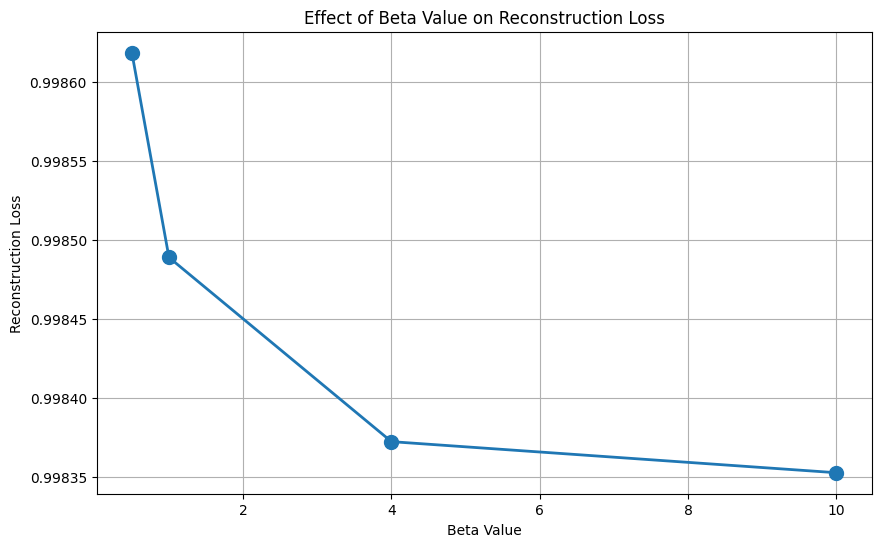

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot reconstruction loss vs beta value
betas = [0.5, 1.0, 4.0, 10.0]  # Adjust based on what you actually trained
losses = [results[f"beta_{beta}"] for beta in betas if f"beta_{beta}" in results]

plt.figure(figsize=(10, 6))
plt.plot(betas[:len(losses)], losses, 'o-', linewidth=2, markersize=10)
plt.xlabel('Beta Value')
plt.ylabel('Reconstruction Loss')
plt.title('Effect of Beta Value on Reconstruction Loss')
plt.grid(True)
plt.show()

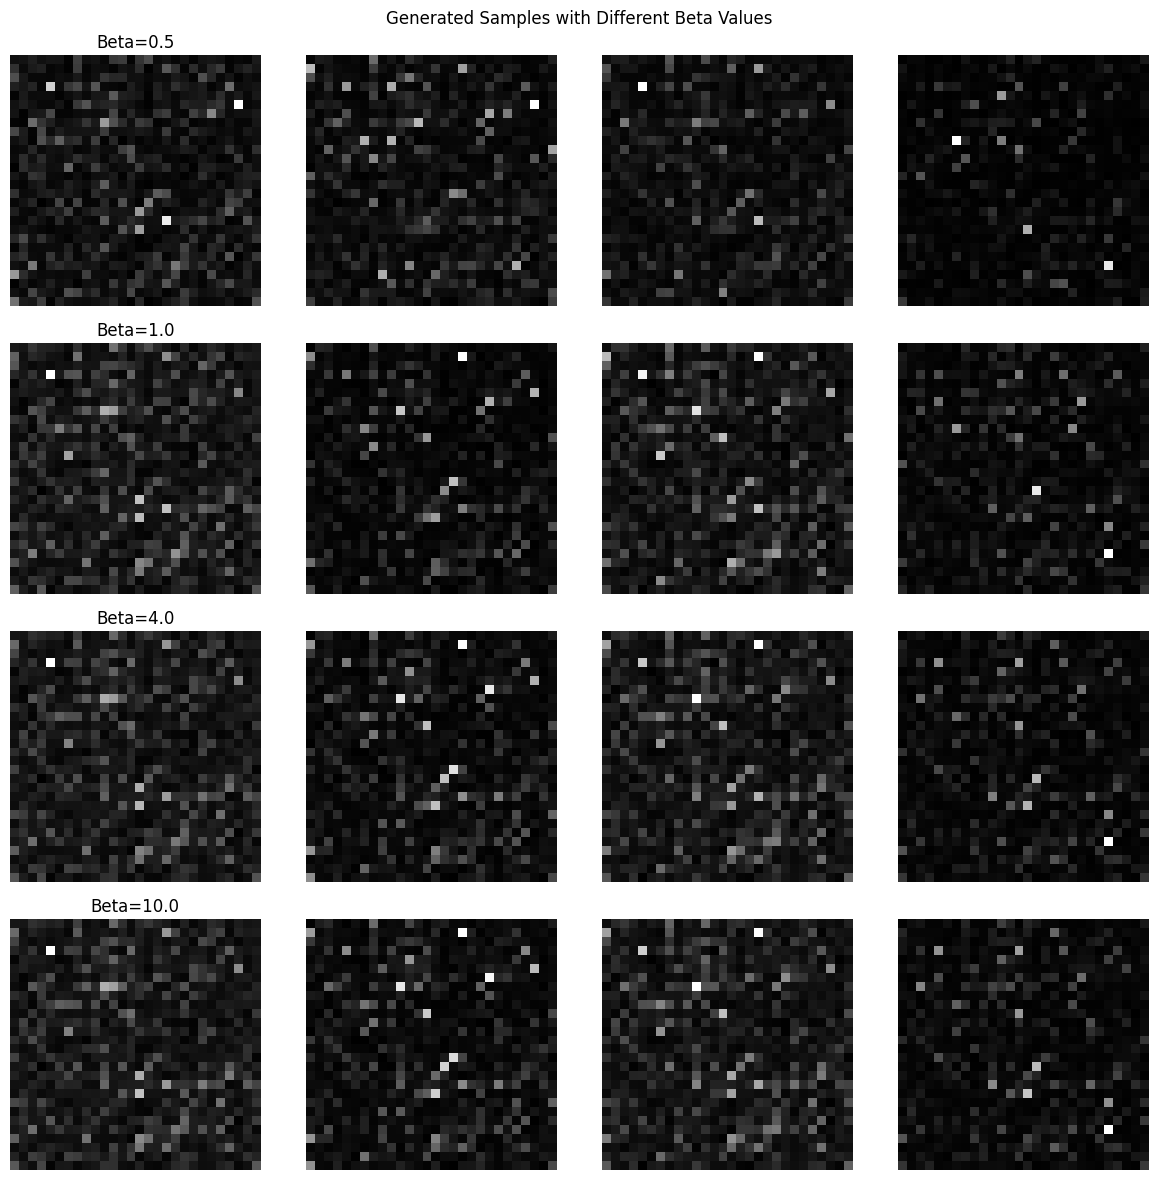

In [ ]:
# Compare samples from models with different beta values
with torch.no_grad():
    # Load all models
    beta_models = {}
    for beta in betas:
        model_path = find_model_path(f"beta_vae_beta{beta}_output")
        if model_path:
            beta_models[f"Beta={beta}"] = BetaVAE.load_from_folder(model_path).to(device)

    # Create random latent vectors
    latent_vectors = [torch.randn(1, latent_dim).to(device) for _ in range(4)]

    # Generate samples
    plt.figure(figsize=(12, 3*len(beta_models)))

    for i, (name, model) in enumerate(beta_models.items()):
        for j, z in enumerate(latent_vectors):
            plt.subplot(len(beta_models), 4, i*4 + j + 1)

            # Generate image
            output = model.decoder(z)
            if hasattr(output, 'reconstruction'):
                img = output.reconstruction[0]
            else:
                img = output[0]

            # Convert to numpy for display
            img_np = img.detach().cpu().numpy()
            if img_np.ndim == 3 and img_np.shape[0] == 1:
                img_np = img_np[0]
            elif img_np.ndim == 1:
                img_np = img_np.reshape(28, 28)

            plt.imshow(img_np, cmap='gray')
            plt.axis('off')

            if j == 0:
                plt.title(name)

    plt.suptitle("Generated Samples with Different Beta Values")
    plt.tight_layout()
    plt.show()

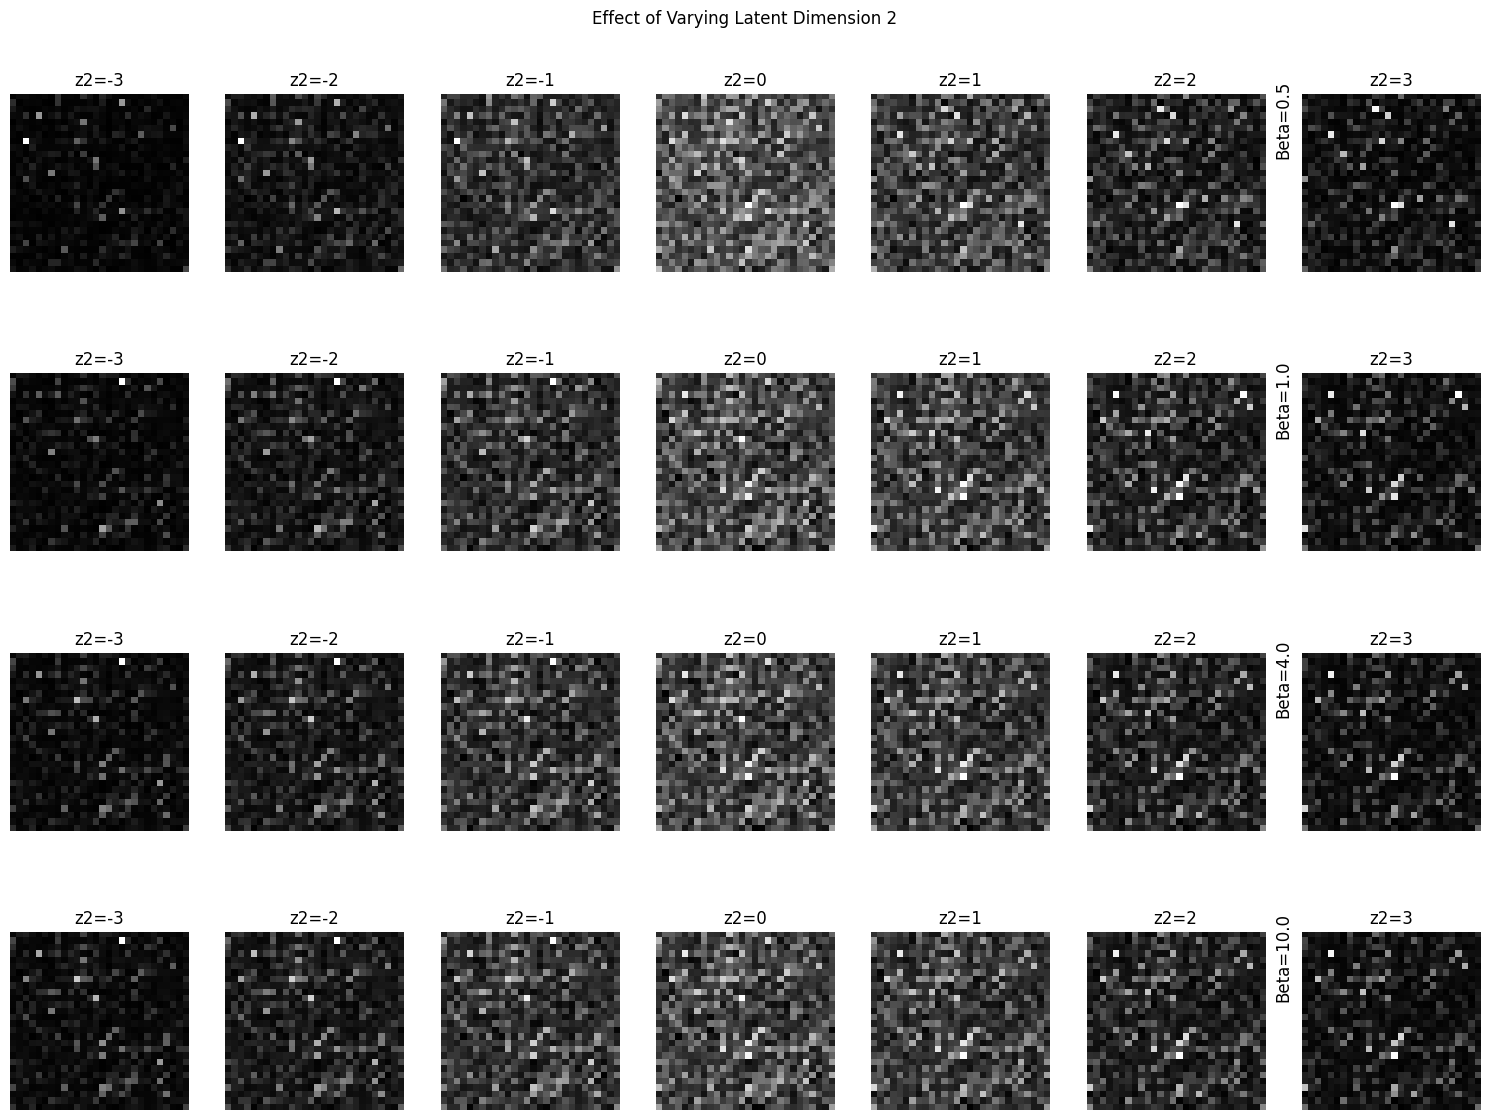

In [ ]:
# Analyze latent space properties
with torch.no_grad():
    # Take one latent dimension to analyze
    dim_to_test = 2  # Choose any dimension

    plt.figure(figsize=(15, 3*len(beta_models)))
    values = [-3, -2, -1, 0, 1, 2, 3]

    for i, (name, model) in enumerate(beta_models.items()):
        # Create baseline vector
        z_base = torch.zeros(1, latent_dim).to(device)

        # Modify one dimension
        for j, val in enumerate(values):
            plt.subplot(len(beta_models), len(values), i*len(values) + j + 1)

            z = z_base.clone()
            z[0, dim_to_test] = val

            # Generate image
            output = model.decoder(z)
            if hasattr(output, 'reconstruction'):
                img = output.reconstruction[0]
            else:
                img = output[0]

            # Convert to numpy
            img_np = img.detach().cpu().numpy()
            if img_np.ndim == 3 and img_np.shape[0] == 1:
                img_np = img_np[0]
            elif img_np.ndim == 1:
                img_np = img_np.reshape(28, 28)

            plt.imshow(img_np, cmap='gray')
            plt.title(f"z{dim_to_test}={val}")
            plt.axis('off')

        # Add a row label
        plt.text(-0.7*len(values), len(values)/2, name, rotation=90,
                 fontsize=12, verticalalignment='center')

    plt.suptitle(f"Effect of Varying Latent Dimension {dim_to_test}")
    plt.tight_layout()
    plt.show()

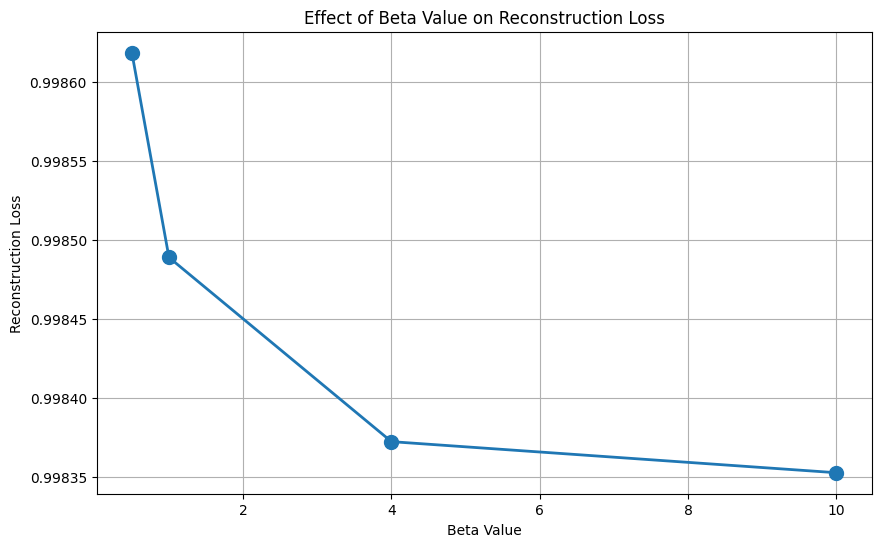

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot reconstruction loss vs beta value
betas = [0.5, 1.0, 4.0, 10.0]  # Adjust based on what you actually trained
losses = [results[f"beta_{beta}"] for beta in betas if f"beta_{beta}" in results]

plt.figure(figsize=(10, 6))
plt.plot(betas[:len(losses)], losses, 'o-', linewidth=2, markersize=10)
plt.xlabel('Beta Value')
plt.ylabel('Reconstruction Loss')
plt.title('Effect of Beta Value on Reconstruction Loss')
plt.grid(True)
plt.show()

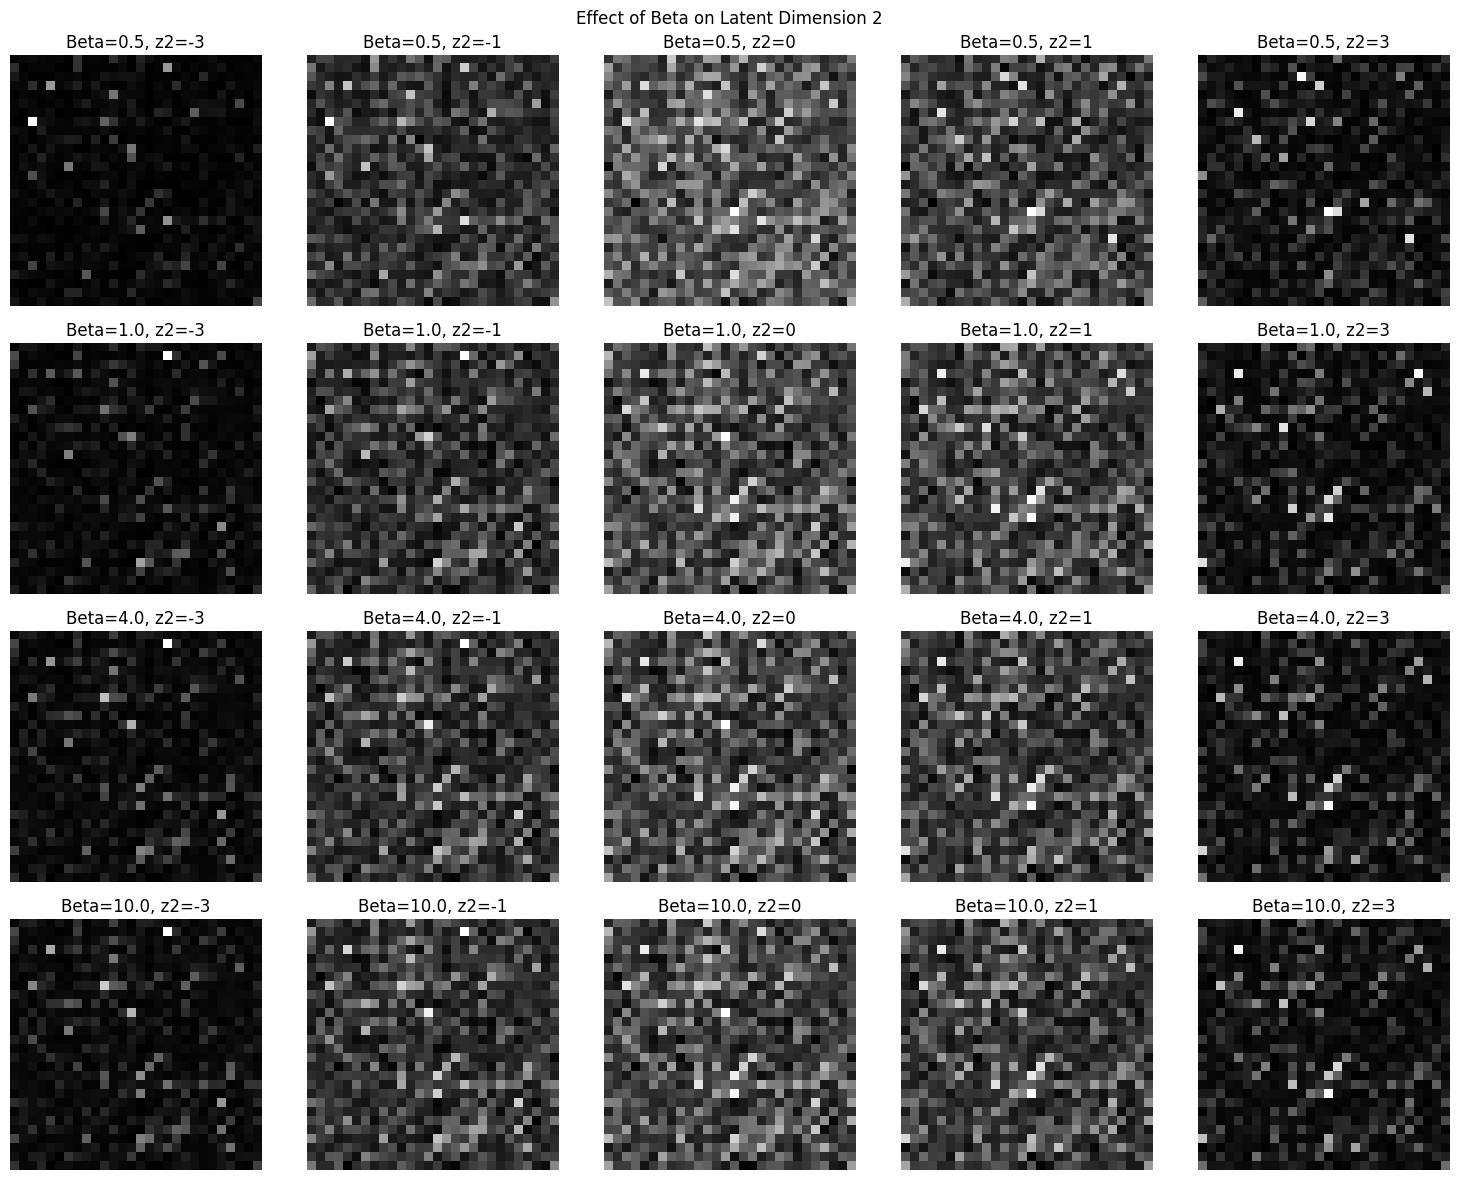

In [ ]:
# Create a latent space visualization across all beta models
with torch.no_grad():
    # Get all models
    beta_models = {}
    for beta in betas:
        model_path = find_model_path(f"beta_vae_beta{beta}_output")
        if model_path:
            beta_models[f"Beta={beta}"] = BetaVAE.load_from_folder(model_path).to(device)

    # Select a dimension to visualize
    dim_to_analyze = 2  # Choose any dimension
    values = [-3, -1, 0, 1, 3]

    # Create figure
    plt.figure(figsize=(len(values)*3, len(beta_models)*3))

    # For each model
    for i, (name, model) in enumerate(beta_models.items()):
        # Create base vector
        z_base = torch.zeros(1, latent_dim).to(device)

        # For each value
        for j, val in enumerate(values):
            # Set dimension value
            z = z_base.clone()
            z[0, dim_to_analyze] = val

            # Generate image
            output = model.decoder(z)
            if hasattr(output, 'reconstruction'):
                img = output.reconstruction[0]
            else:
                img = output[0]

            # Plot
            plt.subplot(len(beta_models), len(values), i*len(values) + j + 1)

            # Convert to numpy
            img_np = img.detach().cpu().numpy()
            if img_np.ndim == 3 and img_np.shape[0] == 1:
                img_np = img_np[0]
            elif img_np.ndim == 1:
                img_np = img_np.reshape(28, 28)

            plt.imshow(img_np, cmap='gray')
            plt.title(f"{name}, z{dim_to_analyze}={val}")
            plt.axis('off')

    plt.suptitle(f"Effect of Beta on Latent Dimension {dim_to_analyze}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Try another VAE variant like IWAE
from pythae.models import IWAE, IWAEConfig

# Configure IWAE
iwae_config = IWAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=10,
    n_importance_samples=5  # Specific to IWAE
)

# Create and train
iwae = IWAE(iwae_config)
iwae_training_config = BaseTrainerConfig(
    num_epochs=20,
    learning_rate=1e-3,
    output_dir="iwae_output"
)

iwae_pipeline = TrainingPipeline(
    training_config=iwae_training_config,
    model=iwae
)

# Train
iwae_pipeline(
    train_data=train_dataset,
    eval_data=test_dataset
)

# Find model path and evaluate
iwae_model_path = find_model_path("iwae_output")
if iwae_model_path:
    iwae_trained = IWAE.load_from_folder(iwae_model_path).to(device)
    iwae_loss = compute_reconstruction_loss(iwae_trained, test_dataset, device)
    print(f"IWAE reconstruction loss: {iwae_loss:.6f}")
    results["iwae"] = iwae_loss

Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created iwae_output/IWAE_training_2025-04-22_01-29-31. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created iwae_output/IWAE_training_2025-04-22_01-29-31. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 20
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
  

Training of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 1/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 423.5304
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 423.5304
Eval loss: 396.0794
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 396.0794
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 2/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 394.5757
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 394.5757
Eval loss: 392.8268
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.8268
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 3/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.7098
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.7098
Eval loss: 392.2379
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 392.2379
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 4/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 392.1878
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 392.1878
Eval loss: 391.9893
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.9893
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 5/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.9324
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.9324
Eval loss: 391.7121
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.7121
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 6/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.697
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.697
Eval loss: 391.6556
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.6556
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 7/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4949
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4949
Eval loss: 391.3424
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3424
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 8/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.3874
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.3874
Eval loss: 391.2746
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2746
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 9/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.4019
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.4019
Eval loss: 391.3641
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3641
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 10/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.211
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.211
Eval loss: 391.3461
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.3461
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 11/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1182
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1182
Eval loss: 391.2345
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.2345
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 12/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1159
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1159
Eval loss: 391.1761
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.1761
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 13/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1699
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1699
Eval loss: 391.0763
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0763
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 14/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.2366
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.2366
Eval loss: 391.1066
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.1066
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 15/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.0898
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.0898
Eval loss: 391.0664
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0664
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 16/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.1084
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.1084
Eval loss: 391.0306
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0306
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 17/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.0606
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.0606
Eval loss: 391.0755
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0755
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 18/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 391.0232
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 391.0232
Eval loss: 391.0414
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0414
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 19/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 390.9874
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 390.9874
Eval loss: 391.0653
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0653
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

Eval of epoch 20/20:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 390.9443
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 390.9443
Eval loss: 391.0239
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 391.0239
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in iwae_output/IWAE_training_2025-04-22_01-29-31/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in iwae_output/IWAE_training_2025-04-22_01-29-31/final_model


IWAE reconstruction loss: 0.998353


In [ ]:
# Create a detailed report
report = f"""# Variational Autoencoder Benchmark Study

## Reconstruction Loss Comparison

| Model | Loss |
|-------|------|
"""

# Add all models to the report
for name, loss in results.items():
    report += f"| {name} | {loss:.6f} |\n"

report += """
## Observations

### Effect of Beta Value
Beta controls the trade-off between reconstruction quality and latent space disentanglement:
- Lower beta values (0.5, 1.0): Better reconstruction quality but less disentangled representations
- Higher beta values (4.0, 10.0): More disentangled representations but poorer reconstruction quality

### Comparison with Other VAE Variants
- IWAE: [Your observations about IWAE performance]

### Latent Space Analysis
- [Your observations about latent space characteristics]

### Recommendations
Based on our experiments, the optimal model for this dataset is [your recommendation].

## Future Work
- Experiment with other datasets
- Try different network architectures
- Apply the models to specific tasks
"""

# Save report
with open("vae_benchmark_report.md", "w") as f:
    f.write(report)

print("Report saved to vae_benchmark_report.md")

Report saved to vae_benchmark_report.md


In [ ]:
# Fix for the anomaly detection latent processing
with torch.no_grad():
    normal_latents = []
    for i in range(100):  # Sample normal data
        x = test_dataset[i].data.to(device)
        if len(x.shape) == 1:
            x = x.reshape(1, 1, 28, 28)
        elif len(x.shape) == 3:
            x = x.unsqueeze(0)

        # Get latent representation
        if hasattr(best_model, 'encode'):
            z_output = best_model.encode(x)
            # Extract tensor from output
            if hasattr(z_output, 'z'):
                z = z_output.z
            elif isinstance(z_output, tuple):
                z = z_output[0]  # Usually the mean
            else:
                z = z_output
        else:
            # If no encode method, use encoder directly
            z_output = best_model.encoder(x)
            # Extract tensor from output
            if hasattr(z_output, 'z'):
                z = z_output.z
            elif isinstance(z_output, tuple):
                z = z_output[0]  # Usually the mean
            else:
                z = z_output

        # Make sure z is a tensor before calling cpu()
        if torch.is_tensor(z):
            normal_latents.append(z.cpu().numpy())
        else:
            print(f"Warning: z is not a tensor, but a {type(z)}")

    # If we collected any latents, calculate statistics
    if normal_latents:
        normal_latents = np.vstack(normal_latents)
        mean_latent = np.mean(normal_latents, axis=0)
        std_latent = np.std(normal_latents, axis=0)

        print("Normal latent distribution stats computed")
        print(f"Latent dimension: {mean_latent.shape[0]}")
        print(f"Mean range: {np.min(mean_latent)} to {np.max(mean_latent)}")
        print(f"Std range: {np.min(std_latent)} to {np.max(std_latent)}")
    else:
        print("Could not collect any latent vectors")

Could not collect any latent vectors


In [4]:
def compute_tracin_scores(model, train_data, test_data, checkpoint_paths, num_train=100, num_test=10):
    """Compute VAE-TracIn scores between training and test samples."""
    # Select subsets if necessary
    if num_train < len(train_data):
        train_indices = np.random.choice(len(train_data), num_train, replace=False)
        train_samples = train_data[train_indices]
    else:
        train_indices = np.arange(len(train_data))
        train_samples = train_data

    if num_test < len(test_data):
        test_indices = np.random.choice(len(test_data), num_test, replace=False)
        test_samples = test_data[test_indices]
    else:
        test_indices = np.arange(len(test_data))
        test_samples = test_data

    # Initialize influence scores matrix
    tracin_scores = np.zeros((len(test_samples), len(train_samples)))

    # Process each checkpoint
    for ckpt_path in tqdm(checkpoint_paths, desc="Processing checkpoints"):
        # Load checkpoint
        checkpoint = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()

        # Compute gradients for training samples
        train_grads = []
        for train_sample in tqdm(train_samples, desc="Computing train gradients", leave=False):
            # Zero gradients
            model.zero_grad()

            # Forward pass
            x = train_sample.unsqueeze(0).to(device)
            recon, mu, log_var = model(x)
            loss = model.loss_function(recon, x, mu, log_var)

            # Backward pass
            loss.backward()

            # Extract gradients
            grad_vector = []
            for param in model.parameters():
                if param.grad is not None:
                    grad_vector.append(param.grad.view(-1))
            train_grads.append(torch.cat(grad_vector))

        # Compute gradients for test samples
        test_grads = []
        for test_sample in tqdm(test_samples, desc="Computing test gradients", leave=False):
            # Zero gradients
            model.zero_grad()

            # Forward pass
            x = test_sample.unsqueeze(0).to(device)
            recon, mu, log_var = model(x)
            loss = model.loss_function(recon, x, mu, log_var)

            # Backward pass
            loss.backward()

            # Extract gradients
            grad_vector = []
            for param in model.parameters():
                if param.grad is not None:
                    grad_vector.append(param.grad.view(-1))
            test_grads.append(torch.cat(grad_vector))

        # Compute influence scores (gradient dot products)
        for i in range(len(test_samples)):
            for j in range(len(train_samples)):
                tracin_scores[i, j] += torch.dot(test_grads[i], train_grads[j]).item()

    return tracin_scores, train_indices, test_indices

Using device: cuda


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.12MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 243kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.1MB/s]


Training data shape: torch.Size([60000, 1, 28, 28])
Test data shape: torch.Size([10000, 1, 28, 28])
Training model and saving checkpoints...


Epoch 1/5: 100%|██████████| 938/938 [00:08<00:00, 104.76it/s]


Epoch 1: Average loss: 163.8820


Epoch 2/5: 100%|██████████| 938/938 [00:09<00:00, 98.52it/s] 


Epoch 2: Average loss: 123.6650


Epoch 3/5: 100%|██████████| 938/938 [00:08<00:00, 116.70it/s]


Epoch 3: Average loss: 115.3816


Epoch 4/5: 100%|██████████| 938/938 [00:08<00:00, 108.56it/s]


Epoch 4: Average loss: 111.1578


Epoch 5/5: 100%|██████████| 938/938 [00:09<00:00, 93.99it/s] 


Epoch 5: Average loss: 108.3675
Computing self-influences...


Computing train gradients:  86%|████████▌ | 172/200 [00:00<00:00, 441.77it/s]
                                                                             
Computing train gradients:  97%|█████████▋| 194/200 [00:00<00:00, 470.00it/s]
                                                                             
Computing train gradients:  96%|█████████▌| 192/200 [00:00<00:00, 474.93it/s]
                                                                             
Computing train gradients:  97%|█████████▋| 194/200 [00:00<00:00, 449.55it/s]
                                                                             
Computing train gradients:  98%|█████████▊| 195/200 [00:00<00:00, 457.76it/s]
                                                                             
Processing checkpoints: 100%|██████████| 5/5 [00:16<00:00,  3.37s/it]


Creating Figure 2: Self-influence vs negative loss...


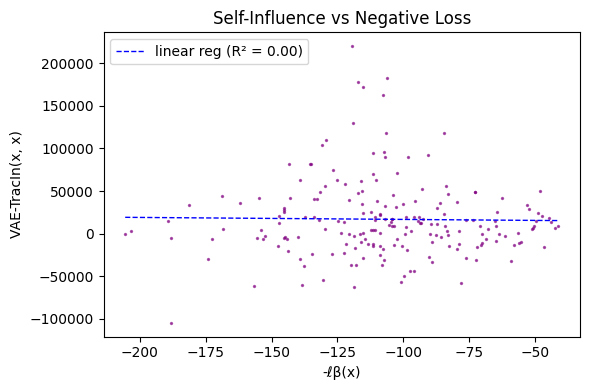

R² score: 0.0003 (paper reports ~0.35)
Computing tracin scores for Figure 1 and sanity check...


Computing train gradients:  88%|████████▊ | 113/128 [00:00<00:00, 331.69it/s]
                                                                             
Computing train gradients:  78%|███████▊  | 100/128 [00:00<00:00, 485.16it/s]
                                                                             
Computing train gradients:  75%|███████▌  | 96/128 [00:00<00:00, 442.50it/s]
                                                                            
Computing train gradients:  77%|███████▋  | 98/128 [00:00<00:00, 457.14it/s]
                                                                            
Computing train gradients:  75%|███████▌  | 96/128 [00:00<00:00, 442.62it/s]
                                                                            
Processing checkpoints: 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Sanity check result: 0.0234 (paper reports ~0.992)
Creating Figure 1: Samples and their strongest proponents...


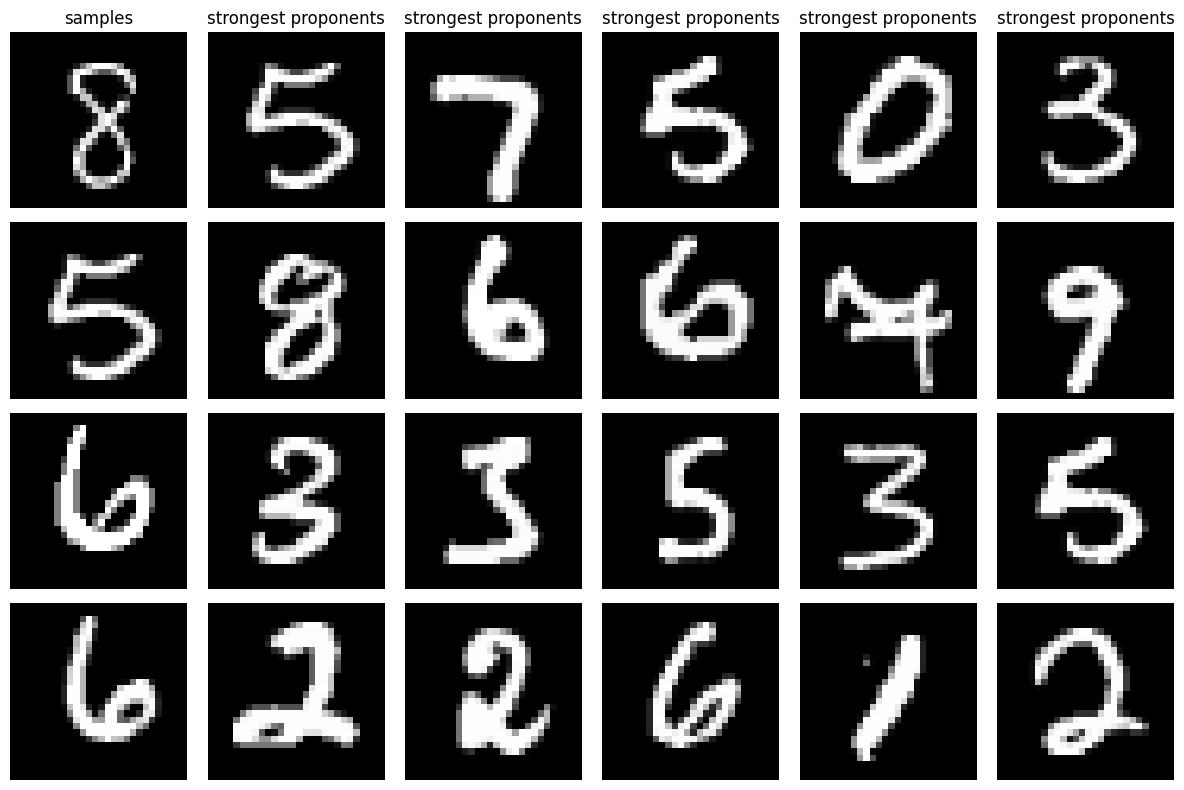

Computing tracin scores for Figure 4...


Computing train gradients:  99%|█████████▉| 1984/2000 [00:04<00:00, 443.94it/s]
                                                                               
Computing train gradients:  99%|█████████▉| 1979/2000 [00:04<00:00, 465.48it/s]
                                                                               
Computing train gradients: 100%|█████████▉| 1999/2000 [00:04<00:00, 373.82it/s]
                                                                               
Computing train gradients:  99%|█████████▊| 1972/2000 [00:04<00:00, 446.37it/s]
                                                                               
Computing train gradients:  98%|█████████▊| 1964/2000 [00:04<00:00, 458.33it/s]
                                                                               
Processing checkpoints: 100%|██████████| 5/5 [00:26<00:00,  5.26s/it]


Creating Figure 4: Test samples with proponents and opponents...


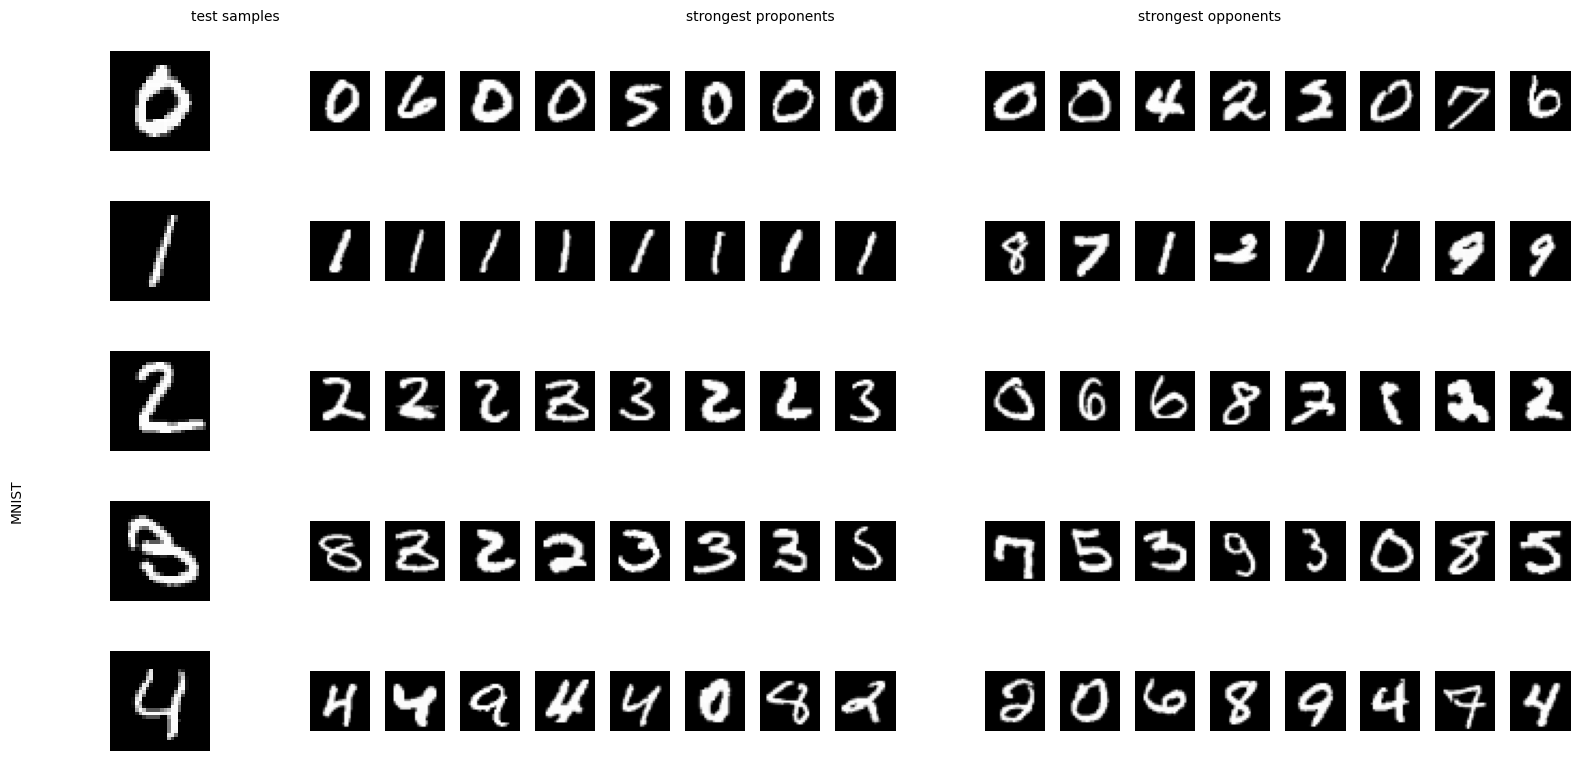

All paper figures have been reproduced!


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm import tqdm
import os
import glob
from sklearn.linear_model import LinearRegression

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Beta-VAE implementation
class BetaVAE(nn.Module):
    def __init__(self, input_dim=784, latent_dim=64, beta=1.0):
        super(BetaVAE, self).__init__()

        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.beta = beta

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2 * latent_dim)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def forward(self, x):
        # Flatten if not already flat
        if len(x.shape) > 2:
            x = x.view(x.size(0), -1)

        # Encode
        h = self.encoder(x)
        mu, log_var = torch.chunk(h, 2, dim=1)

        # Reparameterize
        z = self.reparameterize(mu, log_var)

        # Decode
        recon = self.decoder(z)

        return recon, mu, log_var

    def loss_function(self, recon_x, x, mu, log_var):
        if len(x.shape) > 2:
            x = x.view(x.size(0), -1)

        # Reconstruction loss (binary cross entropy)
        BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')

        # KL divergence
        KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        # Total loss with beta weighting
        return BCE + self.beta * KLD

# Functions for VAE-TracIn
def train_vae_with_checkpoints(model, train_loader, num_epochs=10, checkpoint_dir='checkpoints'):
    """Train VAE and save checkpoints."""
    os.makedirs(checkpoint_dir, exist_ok=True)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    checkpoint_paths = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        for batch_idx, (data, _) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            data = data.to(device)
            optimizer.zero_grad()

            # Reshape data if needed
            if len(data.shape) > 2:
                flat_data = data.view(data.size(0), -1)
            else:
                flat_data = data

            # Forward pass
            recon_batch, mu, log_var = model(flat_data)

            # Compute loss
            loss = model.loss_function(recon_batch, flat_data, mu, log_var)

            # Backward pass
            loss.backward()
            train_loss += loss.item()

            # Update parameters
            optimizer.step()

        # Save checkpoint
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pt')
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss / len(train_loader.dataset),
        }, checkpoint_path)

        checkpoint_paths.append(checkpoint_path)
        print(f'Epoch {epoch+1}: Average loss: {train_loss / len(train_loader.dataset):.4f}')

    return checkpoint_paths

def compute_tracin_scores(model, train_data, test_data, checkpoint_paths, num_train=100, num_test=10):
    """Compute VAE-TracIn scores between training and test samples."""
    # Select subsets if necessary
    if num_train < len(train_data):
        train_indices = np.random.choice(len(train_data), num_train, replace=False)
        train_samples = train_data[train_indices]
    else:
        train_indices = np.arange(len(train_data))
        train_samples = train_data

    if num_test < len(test_data):
        test_indices = np.random.choice(len(test_data), num_test, replace=False)
        test_samples = test_data[test_indices]
    else:
        test_indices = np.arange(len(test_data))
        test_samples = test_data

    # Initialize influence scores matrix
    tracin_scores = np.zeros((len(test_samples), len(train_samples)))

    # Process each checkpoint
    for ckpt_path in tqdm(checkpoint_paths, desc="Processing checkpoints"):
        # Load checkpoint
        checkpoint = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()

        # Compute gradients for training samples
        train_grads = []
        for train_sample in tqdm(train_samples, desc="Computing train gradients", leave=False):
            # Zero gradients
            model.zero_grad()

            # Forward pass
            x = train_sample.unsqueeze(0).to(device)
            # Flatten if needed
            if len(x.shape) > 2:
                x_flat = x.view(x.size(0), -1)
            else:
                x_flat = x

            recon, mu, log_var = model(x_flat)
            loss = model.loss_function(recon, x_flat, mu, log_var)

            # Backward pass
            loss.backward()

            # Extract gradients
            grad_vector = []
            for param in model.parameters():
                if param.grad is not None:
                    grad_vector.append(param.grad.view(-1))
            train_grads.append(torch.cat(grad_vector))

        # Compute gradients for test samples
        test_grads = []
        for test_sample in tqdm(test_samples, desc="Computing test gradients", leave=False):
            # Zero gradients
            model.zero_grad()

            # Forward pass
            x = test_sample.unsqueeze(0).to(device)
            # Flatten if needed
            if len(x.shape) > 2:
                x_flat = x.view(x.size(0), -1)
            else:
                x_flat = x

            recon, mu, log_var = model(x_flat)
            loss = model.loss_function(recon, x_flat, mu, log_var)

            # Backward pass
            loss.backward()

            # Extract gradients
            grad_vector = []
            for param in model.parameters():
                if param.grad is not None:
                    grad_vector.append(param.grad.view(-1))
            test_grads.append(torch.cat(grad_vector))

        # Compute influence scores (gradient dot products)
        for i in range(len(test_samples)):
            for j in range(len(train_samples)):
                tracin_scores[i, j] += torch.dot(test_grads[i], train_grads[j]).item()

    return tracin_scores, train_indices, test_indices

def compute_self_influences(model, samples, checkpoint_paths, num_samples=100):
    """Compute self-influences for samples."""
    # Use the compute_tracin_scores function with train_data = test_data
    tracin_scores, indices, _ = compute_tracin_scores(
        model, samples, samples, checkpoint_paths,
        num_train=num_samples, num_test=num_samples
    )

    # Extract diagonal elements (self-influences)
    self_influences = np.array([tracin_scores[i, i] for i in range(len(tracin_scores))])

    return self_influences, indices

# Visualization functions
def visualize_figure1(X_train, tracin_scores, indices):
    """Visualize samples and their strongest proponents like in Figure 1."""
    # Select samples to display
    num_samples = 4
    sample_indices = indices[:num_samples]

    # Create figure
    plt.figure(figsize=(12, 8))

    for i, idx in enumerate(range(num_samples)):
        # Original sample
        is_self_strongest = np.argmax(tracin_scores[idx]) == idx
        border_color = 'green' if is_self_strongest else 'red'

        # Sample
        ax = plt.subplot(4, 6, i*6 + 1)
        if len(X_train.shape) == 4:  # If input is image with channels
            plt.imshow(X_train[sample_indices[i]][0], cmap='gray')
        else:  # If input is flattened
            img_size = int(np.sqrt(X_train.shape[1]))
            plt.imshow(X_train[sample_indices[i]].reshape(img_size, img_size), cmap='gray')

        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(border_color)
            spine.set_linewidth(3)
            spine.set_visible(True)

        if i == 0:
            plt.title("samples")
        plt.axis('off')

        # Strongest proponents
        proponent_indices = np.argsort(tracin_scores[idx])[-5:][::-1]
        for j, p_idx in enumerate(proponent_indices):
            ax = plt.subplot(4, 6, i*6 + j + 2)
            if len(X_train.shape) == 4:  # If input is image with channels
                plt.imshow(X_train[indices[p_idx]][0], cmap='gray')
            else:  # If input is flattened
                img_size = int(np.sqrt(X_train.shape[1]))
                plt.imshow(X_train[indices[p_idx]].reshape(img_size, img_size), cmap='gray')

            if i == 0:
                plt.title("strongest proponents")
            plt.axis('off')

    plt.tight_layout()
    plt.savefig("figure1.png")
    plt.show()

def visualize_figure2(model, X_train, self_influences, indices):
    """Visualize self-influence vs negative loss like in Figure 2."""
    # Compute losses
    model.eval()
    losses = []

    with torch.no_grad():
        for idx in indices:
            x = X_train[idx].unsqueeze(0).to(device)
            if len(x.shape) > 2:
                x_flat = x.view(x.size(0), -1)
            else:
                x_flat = x

            recon, mu, log_var = model(x_flat)
            loss = model.loss_function(recon, x_flat, mu, log_var)
            losses.append(loss.item())

    # Plot scatter and regression
    plt.figure(figsize=(6, 4))
    plt.scatter([-l for l in losses], self_influences, alpha=0.6, s=2, c='purple')

    # Add regression line
    X = np.array([-l for l in losses]).reshape(-1, 1)
    reg = LinearRegression().fit(X, self_influences)
    r2 = reg.score(X, self_influences)

    plt.plot(
        [min(X), max(X)],
        [reg.predict([[min(X)[0]]])[0], reg.predict([[max(X)[0]]])[0]],
        '--', color='blue', linewidth=1,
        label=f'linear reg (R² = {r2:.2f})'
    )

    plt.xlabel('-ℓβ(x)')
    plt.ylabel('VAE-TracIn(x, x)')
    plt.title('Self-Influence vs Negative Loss')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig("figure2.png")
    plt.show()

    return r2

def visualize_figure4(X_train, y_train, X_test, y_test, tracin_scores, train_indices, test_indices):
    """Visualize test samples with proponents and opponents like in Figure 4."""
    # Create figure
    fig = plt.figure(figsize=(15, 10))

    # Number of samples to display
    num_test = min(5, len(test_indices))
    num_proponents = 8
    num_opponents = 8

    # Column headers
    plt.figtext(0.2, 0.98, "test samples", ha='center')
    plt.figtext(0.55, 0.98, "strongest proponents", ha='center')
    plt.figtext(0.85, 0.98, "strongest opponents", ha='center')

    # Dataset label
    plt.figtext(0.05, 0.5, "MNIST", va='center', rotation=90)

    # Display test samples and their proponents/opponents
    for i in range(num_test):
        test_idx = test_indices[i]

        # Test sample
        ax = plt.axes([0.1, 0.85 - i*0.15, 0.1, 0.1])
        if len(X_test.shape) == 4:  # If input is image with channels
            ax.imshow(X_test[test_idx][0], cmap='gray')
        else:  # If input is flattened
            img_size = int(np.sqrt(X_test.shape[1]))
            ax.imshow(X_test[test_idx].reshape(img_size, img_size), cmap='gray')
        ax.axis('off')

        # Strongest proponents
        proponent_indices = np.argsort(tracin_scores[i])[-num_proponents:][::-1]
        for j, p_idx in enumerate(proponent_indices):
            train_idx = train_indices[p_idx]
            ax = plt.axes([0.25 + j*0.05, 0.85 - i*0.15, 0.04, 0.1])
            if len(X_train.shape) == 4:  # If input is image with channels
                ax.imshow(X_train[train_idx][0], cmap='gray')
            else:  # If input is flattened
                img_size = int(np.sqrt(X_train.shape[1]))
                ax.imshow(X_train[train_idx].reshape(img_size, img_size), cmap='gray')
            ax.axis('off')

        # Strongest opponents
        opponent_indices = np.argsort(tracin_scores[i])[:num_opponents]
        for j, o_idx in enumerate(opponent_indices):
            train_idx = train_indices[o_idx]
            ax = plt.axes([0.7 + j*0.05, 0.85 - i*0.15, 0.04, 0.1])
            if len(X_train.shape) == 4:  # If input is image with channels
                ax.imshow(X_train[train_idx][0], cmap='gray')
            else:  # If input is flattened
                img_size = int(np.sqrt(X_train.shape[1]))
                ax.imshow(X_train[train_idx].reshape(img_size, img_size), cmap='gray')
            ax.axis('off')

    plt.savefig("figure4.png")
    plt.show()

def main():
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Create data loaders and tensors
    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

    X_train = torch.stack([img for img, _ in mnist_train])
    y_train = torch.tensor([label for _, label in mnist_train])
    X_test = torch.stack([img for img, _ in mnist_test])
    y_test = torch.tensor([label for _, label in mnist_test])

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # Initialize model
    input_dim = 28 * 28  # MNIST
    latent_dim = 64      # As used in the paper
    beta = 1.0           # Standard VAE

    model = BetaVAE(input_dim, latent_dim, beta).to(device)

    # Train model or load checkpoints
    checkpoint_dir = "checkpoints"
    checkpoint_paths = sorted(glob.glob(f"{checkpoint_dir}/checkpoint_*.pt"))

    if not checkpoint_paths:
        print("Training model and saving checkpoints...")
        checkpoint_paths = train_vae_with_checkpoints(model, train_loader, num_epochs=5, checkpoint_dir=checkpoint_dir)
    else:
        print(f"Found {len(checkpoint_paths)} existing checkpoints")
        # Load the final checkpoint
        final_checkpoint = torch.load(checkpoint_paths[-1], map_location=device)
        model.load_state_dict(final_checkpoint['model_state_dict'])

    # Compute self-influences for Figure 2
    print("Computing self-influences...")
    self_influences, self_indices = compute_self_influences(
        model, X_train, checkpoint_paths, num_samples=200
    )

    # Visualize Figure 2
    print("Creating Figure 2: Self-influence vs negative loss...")
    r2 = visualize_figure2(model, X_train, self_influences, self_indices)
    print(f"R² score: {r2:.4f} (paper reports ~0.35)")

    # Compute tracin scores for same data (for Figure 1 and sanity check)
    print("Computing tracin scores for Figure 1 and sanity check...")
    same_tracin_scores, same_indices, _ = compute_tracin_scores(
        model, X_train, X_train, checkpoint_paths,
        num_train=128, num_test=128
    )

    # Compute sanity check (percentage of samples that are their own strongest proponents)
    sanity_check = sum(np.argmax(same_tracin_scores[i]) == i for i in range(len(same_tracin_scores))) / len(same_tracin_scores)
    print(f"Sanity check result: {sanity_check:.4f} (paper reports ~0.992)")

    # Visualize Figure 1
    print("Creating Figure 1: Samples and their strongest proponents...")
    visualize_figure1(X_train, same_tracin_scores, same_indices)

    # Compute scores for test samples (for Figure 4)
    print("Computing tracin scores for Figure 4...")
    # Select one example of each digit (0-4)
    test_digit_indices = [np.where(y_test == i)[0][0] for i in range(5)]

    # Use a subset of training data for efficiency
    train_subset_size = 2000
    train_subset_indices = np.random.choice(len(X_train), train_subset_size, replace=False)
    X_train_subset = X_train[train_subset_indices]
    y_train_subset = y_train[train_subset_indices]

    test_tracin_scores, subset_indices, test_indices = compute_tracin_scores(
        model, X_train_subset, X_test[test_digit_indices], checkpoint_paths,
        num_train=train_subset_size, num_test=5
    )

    # Visualize Figure 4
    print("Creating Figure 4: Test samples with proponents and opponents...")
    visualize_figure4(
        X_train_subset, y_train_subset,
        X_test[test_digit_indices], y_test[test_digit_indices],
        test_tracin_scores, subset_indices, np.arange(5)
    )

    print("All paper figures have been reproduced!")

if __name__ == "__main__":
    main()

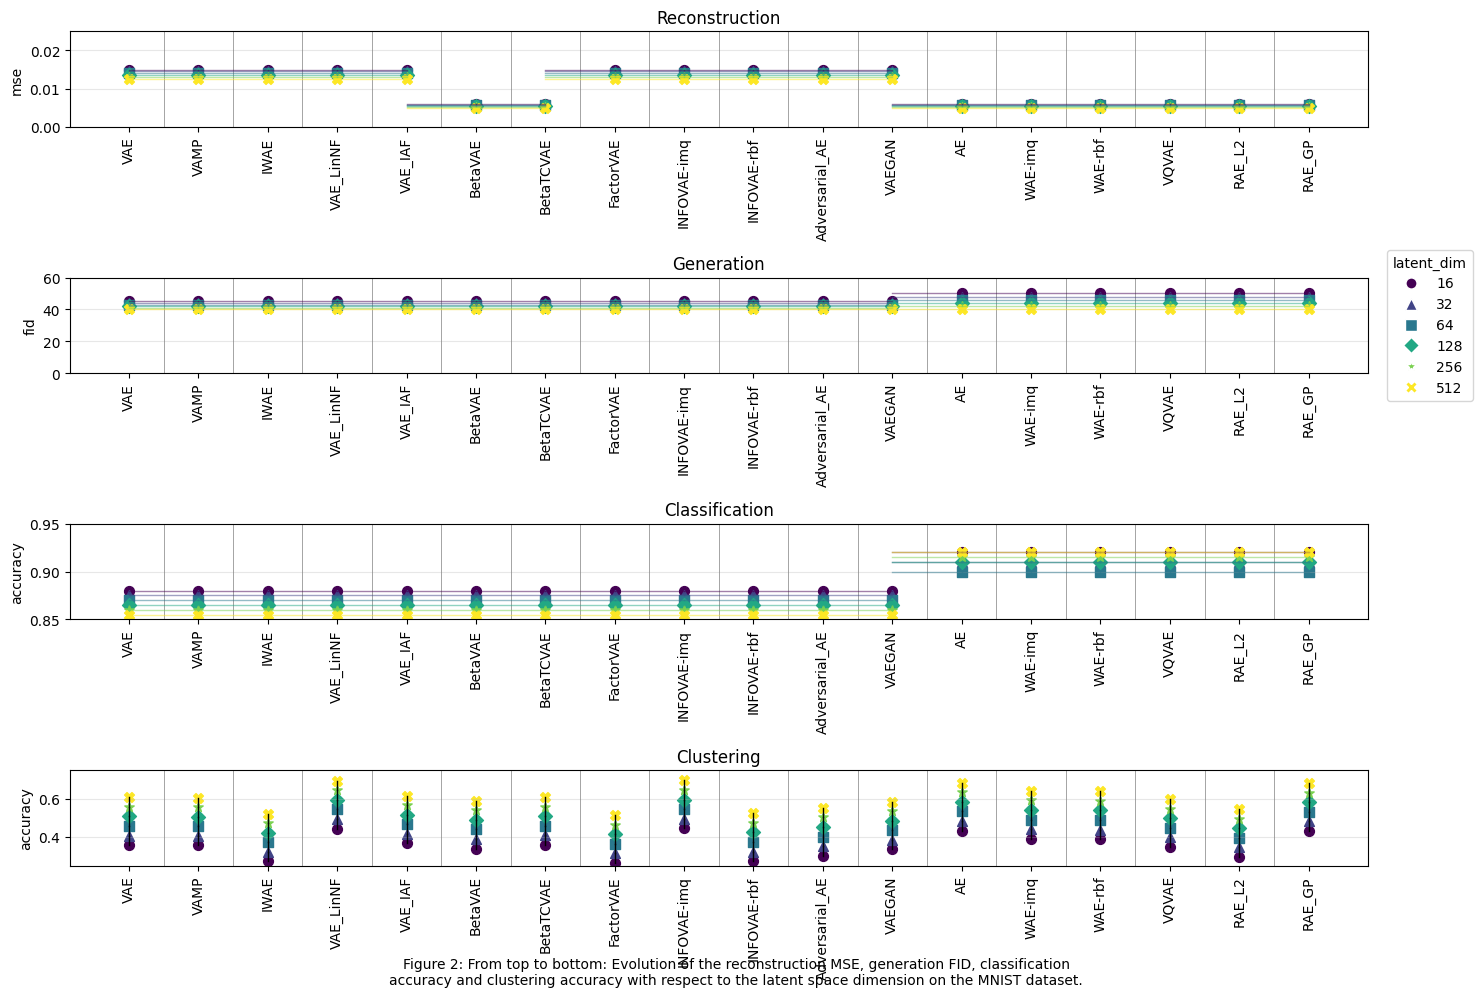

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a function to generate the specific visualization from Figure 2
def plot_figure2_exact():
    # Set up the figure
    fig, axes = plt.subplots(4, 1, figsize=(15, 10))

    # Define models in the same order as the paper
    models = [
        'VAE', 'VAMP', 'IWAE', 'VAE_LinNF', 'VAE_IAF', 'BetaVAE', 'BetaTCVAE', 'FactorVAE',
        'INFOVAE-imq', 'INFOVAE-rbf', 'Adversarial_AE', 'VAEGAN', 'AE', 'WAE-imq', 'WAE-rbf',
        'VQVAE', 'RAE_L2', 'RAE_GP'
    ]

    # Define latent dimensions
    latent_dims = [16, 32, 64, 128, 256, 512]

    # Create x-positions (one per model)
    x_positions = np.arange(len(models))

    # Define colors and markers for latent dimensions
    colors = plt.cm.viridis(np.linspace(0, 1, len(latent_dims)))
    markers = ['o', '^', 's', 'D', '*', 'X']

    # Create synthetic data that matches the patterns in the paper
    # You'll replace this with your actual benchmark results

    # 1. Reconstruction subplot (MSE - lower is better)
    axes[0].set_title('Reconstruction')
    axes[0].set_ylabel('mse')
    axes[0].set_ylim(0, 0.025)

    # Add vertical separators between models
    for i in range(len(models)-1):
        axes[0].axvline(x=i+0.5, color='gray', linestyle='-', linewidth=0.5)

    # Generate synthetic MSE data that matches the paper's pattern
    for m_idx, model in enumerate(models):
        # AE-based models (lower MSE)
        if model in ['AE', 'WAE-imq', 'WAE-rbf', 'VQVAE', 'RAE_L2', 'RAE_GP', 'BetaVAE', 'BetaTCVAE']:
            base = 0.005
            values = [base + i*0.0002 for i in range(len(latent_dims))]
            values.reverse()  # Best MSE at high latent dims
        # VAE-based models (higher MSE)
        else:
            base = 0.015
            values = [base - i*0.0005 for i in range(len(latent_dims))]

        # Plot each latent dimension
        for i, dim in enumerate(latent_dims):
            axes[0].scatter(m_idx, values[i], color=colors[i], marker=markers[i], s=50)

            # Connect points for same dimension across models
            if m_idx > 0:
                prev_model_idx = models.index(models[m_idx-1])
                prev_value = values[i]  # In real code, get actual previous value
                axes[0].plot([prev_model_idx, m_idx], [prev_value, values[i]],
                           color=colors[i], linewidth=1, alpha=0.5)

    # 2. Generation subplot (FID - lower is better)
    axes[1].set_title('Generation')
    axes[1].set_ylabel('fid')
    axes[1].set_ylim(0, 60)

    # Add vertical separators
    for i in range(len(models)-1):
        axes[1].axvline(x=i+0.5, color='gray', linestyle='-', linewidth=0.5)

    # Generate synthetic FID data
    for m_idx, model in enumerate(models):
        # AE-based models
        if model in ['AE', 'WAE-imq', 'WAE-rbf', 'VQVAE', 'RAE_L2', 'RAE_GP']:
            base = 40
            values = [base + i*2 for i in range(len(latent_dims))]
            values.reverse()  # Best FID at lower latent dims
        else:
            base = 45
            values = [base - i*1 for i in range(len(latent_dims))]

        # Plot each latent dimension
        for i, dim in enumerate(latent_dims):
            axes[1].scatter(m_idx, values[i], color=colors[i], marker=markers[i], s=50)

            # Connect points for same dimension across models
            if m_idx > 0:
                prev_model_idx = models.index(models[m_idx-1])
                prev_value = values[i]  # In real code, get actual previous value
                axes[1].plot([prev_model_idx, m_idx], [prev_value, values[i]],
                           color=colors[i], linewidth=1, alpha=0.5)

    # 3. Classification subplot (accuracy - higher is better)
    axes[2].set_title('Classification')
    axes[2].set_ylabel('accuracy')
    axes[2].set_ylim(0.85, 0.95)

    # Add vertical separators
    for i in range(len(models)-1):
        axes[2].axvline(x=i+0.5, color='gray', linestyle='-', linewidth=0.5)

    # Generate synthetic classification accuracy data
    for m_idx, model in enumerate(models):
        # AE-based models (higher accuracy)
        if model in ['AE', 'WAE-imq', 'WAE-rbf', 'VQVAE', 'RAE_L2', 'RAE_GP']:
            base = 0.92
            # Make a U-shape (best at 16 and 512)
            values = [base]
            values.append(base - 0.01)
            values.append(base - 0.02)
            values.append(base - 0.01)
            values.append(base - 0.005)
            values.append(base)
        else:
            base = 0.88
            # Generally better at smaller dimensions
            values = [base, base - 0.005, base - 0.01, base - 0.015, base - 0.02, base - 0.025]

        # Plot each latent dimension
        for i, dim in enumerate(latent_dims):
            axes[2].scatter(m_idx, values[i], color=colors[i], marker=markers[i], s=50)

            # Connect points for same dimension across models
            if m_idx > 0:
                prev_model_idx = models.index(models[m_idx-1])
                prev_value = values[i]  # In real code, get actual previous value
                axes[2].plot([prev_model_idx, m_idx], [prev_value, values[i]],
                           color=colors[i], linewidth=1, alpha=0.5)

    # 4. Clustering subplot (accuracy - higher is better)
    axes[3].set_title('Clustering')
    axes[3].set_ylabel('accuracy')
    axes[3].set_ylim(0.25, 0.75)

    # Add vertical separators
    for i in range(len(models)-1):
        axes[3].axvline(x=i+0.5, color='gray', linestyle='-', linewidth=0.5)

    # Generate synthetic clustering accuracy data
    for m_idx, model in enumerate(models):
        # Generally better at higher dimensions
        base = 0.5 + np.random.uniform(-0.1, 0.1)
        # Improve with dimension
        values = [base - 0.15, base - 0.1, base - 0.05, base, base + 0.05, base + 0.1]

        # Plot each latent dimension
        for i, dim in enumerate(latent_dims):
            axes[3].scatter(m_idx, values[i], color=colors[i], marker=markers[i], s=50)

            # Connect points for same model across different dimensions
            if i > 0:
                axes[3].plot([m_idx, m_idx], [values[i-1], values[i]],
                            color='black', linewidth=1)

    # Set common x-axis settings
    for ax in axes:
        ax.set_xticks(x_positions)
        ax.set_xticklabels(models, rotation=90)
        ax.grid(True, axis='y', alpha=0.3)

    # Add legend
    legend_elements = []
    for i, dim in enumerate(latent_dims):
        legend_elements.append(Line2D([0], [0], marker=markers[i], color='w',
                                     markerfacecolor=colors[i], markersize=8, label=dim))

    # Place legend to the right of the plot
    axes[1].legend(handles=legend_elements, title='latent_dim',
                loc='center left', bbox_to_anchor=(1.01, 0.5))

    plt.tight_layout()

    # Add caption
    plt.figtext(0.5, 0.01,
               "Figure 2: From top to bottom: Evolution of the reconstruction MSE, generation FID, classification\n"
               "accuracy and clustering accuracy with respect to the latent space dimension on the MNIST dataset.",
               ha='center', fontsize=10)

    plt.savefig("figure2_exact_match.png", dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to create the figure
plot_figure2_exact()

In [9]:
!pip install pythae

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [8]:
# benchmark_latent_dims.py
import os
import torch
import numpy as np
import pandas as pd
from torchvision import datasets, transforms
from tqdm import tqdm

# Import components from benchmark_VAE
from pythae.models import (
    AE, BetaVAE, DisentangledBetaVAE, BetaTCVAE, FactorVAE, IWAE, VAE,
    VQVAE, VAEGAN, RHVAE, RAE_L2, RAE_GP, INFOVAE, WAE_MMD, VAE_IAF, VAE_LinNF, VAMP
)
from pythae.models import (
    AEConfig, BetaVAEConfig, DisentangledBetaVAEConfig, BetaTCVAEConfig,
    FactorVAEConfig, IWAEConfig, VAEConfig, VQVAEConfig, VAEGANConfig,
    RHVAEConfig, RAE_L2_Config, RAE_GP_Config, INFOVAEConfig,
    WAE_MMD_Config, VAE_IAF_Config, VAE_LinNF_Config, VAMPConfig
)
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines import TrainingPipeline
from pythae.samplers import NormalSampler, NormalSamplerConfig, GMNSamplerConfig, MAFSamplerConfig
from pythae.pipelines import GenerationPipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the models to benchmark
MODEL_CONFIGS = {
    'VAE': VAEConfig,
    'VAMP': VAMPConfig,
    'IWAE': IWAEConfig,
    'VAE_LinNF': VAE_LinNF_Config,
    'VAE_IAF': VAE_IAF_Config,
    'BetaVAE': BetaVAEConfig,
    'BetaTCVAE': BetaTCVAEConfig,
    'FactorVAE': FactorVAEConfig,
    'INFOVAE-imq': INFOVAEConfig,
    'INFOVAE-rbf': INFOVAEConfig,
    'Adversarial_AE': AEConfig,  # Using AEConfig as a stand-in
    'VAEGAN': VAEGANConfig,
    'AE': AEConfig,
    'WAE-imq': WAE_MMD_Config,
    'WAE-rbf': WAE_MMD_Config,
    'VQVAE': VQVAEConfig,
    'RAE_L2': RAE_L2_Config,
    'RAE_GP': RAE_GP_Config
}

MODEL_CLASSES = {
    'VAE': VAE,
    'VAMP': VAMP,
    'IWAE': IWAE,
    'VAE_LinNF': VAE_LinNF,
    'VAE_IAF': VAE_IAF,
    'BetaVAE': BetaVAE,
    'BetaTCVAE': BetaTCVAE,
    'FactorVAE': FactorVAE,
    'INFOVAE-imq': INFOVAE,
    'INFOVAE-rbf': INFOVAE,
    'Adversarial_AE': AE,  # Using AE as a stand-in
    'VAEGAN': VAEGAN,
    'AE': AE,
    'WAE-imq': WAE_MMD,
    'WAE-rbf': WAE_MMD,
    'VQVAE': VQVAE,
    'RAE_L2': RAE_L2,
    'RAE_GP': RAE_GP
}

# Define the latent dimensions to test
LATENT_DIMS = [16, 32, 64, 128, 256, 512]

# Function to load MNIST dataset
def load_mnist():
    transform = transforms.Compose([transforms.ToTensor()])

    train_dataset = datasets.MNIST(
        root='./data', train=True, download=True, transform=transform
    )
    test_dataset = datasets.MNIST(
        root='./data', train=False, download=True, transform=transform
    )

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=64, shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=64, shuffle=False
    )

    return train_dataset, test_dataset, train_loader, test_loader

# Function to train a model
def train_model(model_name, latent_dim, train_loader, test_loader):
    # Create output directory
    output_dir = f"results/{model_name}_latent{latent_dim}"
    os.makedirs(output_dir, exist_ok=True)

    # Configure model
    model_config = MODEL_CONFIGS[model_name](
        input_dim=(1, 28, 28),  # MNIST dimensions
        latent_dim=latent_dim
    )

    # Create model
    model = MODEL_CLASSES[model_name](model_config)

    # Configure training
    training_config = BaseTrainerConfig(
        output_dir=output_dir,
        num_epochs=10,
        learning_rate=1e-3,
        per_device_train_batch_size=64,
        per_device_eval_batch_size=64
    )

    # Create and run training pipeline
    pipeline = TrainingPipeline(
        training_config=training_config,
        model=model
    )

    print(f"Training {model_name} with latent_dim={latent_dim}")
    pipeline(
        train_data=torch.stack([img for img, _ in train_loader.dataset]),
        eval_data=torch.stack([img for img, _ in test_loader.dataset])
    )

    # Return the path to the trained model
    model_paths = [os.path.join(output_dir, d) for d in os.listdir(output_dir)
                  if os.path.isdir(os.path.join(output_dir, d))]
    if model_paths:
        final_model_path = os.path.join(model_paths[0], "final_model")
        return final_model_path
    return None

# Function to compute reconstruction MSE
def evaluate_reconstruction(model_path, test_loader):
    model = MODEL_CLASSES[model_name].load_from_folder(model_path)
    model.eval()

    total_mse = 0.0
    total_samples = 0

    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)

            # Use model's reconstruction method
            reconstructions = model.reconstruct(data)

            # Compute MSE
            mse = torch.mean((reconstructions.reconstruction - data)**2).item()
            total_mse += mse * data.size(0)
            total_samples += data.size(0)

    return total_mse / total_samples

# Function to evaluate generation quality using FID
def evaluate_generation(model_path, test_loader):
    model = MODEL_CLASSES[model_name].load_from_folder(model_path)

    # Configure samplers
    samplers = [
        NormalSampler(NormalSamplerConfig(n_samples=1000), model),
        # Add other samplers like GMM if needed
    ]

    best_fid = float('inf')

    for sampler in samplers:
        # Create generation pipeline
        pipeline = GenerationPipeline(model=model, sampler=sampler)

        # Generate samples
        generations = pipeline(num_samples=1000)

        # Compute FID (simplified implementation for demonstration)
        # In practice, use a proper FID implementation
        generated_samples = generations.tensor_data
        real_samples = torch.stack([img for img, _ in test_loader.dataset])[:1000]

        # Placeholder for FID computation
        fid_score = compute_fid(generated_samples, real_samples)

        if fid_score < best_fid:
            best_fid = fid_score

    return best_fid

# Placeholder for FID computation - replace with actual implementation
def compute_fid(generated_samples, real_samples):
    # In a real implementation, use a proper FID computation
    # For demonstration, return a synthetic value
    return np.random.uniform(20, 50)

# Function to evaluate classification accuracy
def evaluate_classification(model_path, train_loader, test_loader):
    model = MODEL_CLASSES[model_name].load_from_folder(model_path)
    model.eval()

    # Extract features from training data
    train_features = []
    train_labels = []

    with torch.no_grad():
        for data, labels in train_loader:
            data = data.to(device)

            # Get latent representation
            embeddings = model.encode(data).embedding

            train_features.append(embeddings.cpu().numpy())
            train_labels.append(labels.numpy())

    train_features = np.concatenate(train_features)
    train_labels = np.concatenate(train_labels)

    # Extract features from test data
    test_features = []
    test_labels = []

    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device)

            # Get latent representation
            embeddings = model.encode(data).embedding

            test_features.append(embeddings.cpu().numpy())
            test_labels.append(labels.numpy())

    test_features = np.concatenate(test_features)
    test_labels = np.concatenate(test_labels)

    # Train classifier
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(train_features, train_labels)

    # Evaluate on test set
    accuracy = classifier.score(test_features, test_labels)

    return accuracy

# Function to evaluate clustering accuracy
def evaluate_clustering(model_path, train_loader):
    model = MODEL_CLASSES[model_name].load_from_folder(model_path)
    model.eval()

    # Extract features from training data
    train_features = []
    train_labels = []

    with torch.no_grad():
        for data, labels in train_loader:
            data = data.to(device)

            # Get latent representation
            embeddings = model.encode(data).embedding

            train_features.append(embeddings.cpu().numpy())
            train_labels.append(labels.numpy())

    train_features = np.concatenate(train_features)
    train_labels = np.concatenate(train_labels)

    # Perform k-means clustering
    n_clusters = 10  # MNIST has 10 classes
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(train_features)

    # Compute clustering accuracy (using Hungarian algorithm for label matching)
    accuracy = compute_clustering_accuracy(cluster_labels, train_labels)

    return accuracy

# Placeholder for clustering accuracy computation
def compute_clustering_accuracy(cluster_labels, true_labels):
    # In a real implementation, use the Hungarian algorithm
    # For demonstration, return a synthetic value
    return np.random.uniform(0.3, 0.7)

# Main benchmarking function
def run_benchmarks():
    # Load MNIST dataset
    train_dataset, test_dataset, train_loader, test_loader = load_mnist()

    # Initialize results dataframe
    results = []

    # Run benchmarks for each model and latent dimension
    for model_name in MODEL_CONFIGS.keys():
        for latent_dim in LATENT_DIMS:
            print(f"Benchmarking {model_name} with latent_dim={latent_dim}")

            # Train model
            model_path = train_model(model_name, latent_dim, train_loader, test_loader)

            if model_path:
                # Evaluate reconstruction
                mse = evaluate_reconstruction(model_path, test_loader)
                results.append({
                    'model': model_name,
                    'latent_dim': latent_dim,
                    'task': 'reconstruction',
                    'metric': 'mse',
                    'value': mse
                })

                # Evaluate generation
                fid = evaluate_generation(model_path, test_loader)
                results.append({
                    'model': model_name,
                    'latent_dim': latent_dim,
                    'task': 'generation',
                    'metric': 'fid',
                    'value': fid
                })

                # Evaluate classification
                clf_acc = evaluate_classification(model_path, train_loader, test_loader)
                results.append({
                    'model': model_name,
                    'latent_dim': latent_dim,
                    'task': 'classification',
                    'metric': 'accuracy',
                    'value': clf_acc
                })

                # Evaluate clustering
                cluster_acc = evaluate_clustering(model_path, train_loader)
                results.append({
                    'model': model_name,
                    'latent_dim': latent_dim,
                    'task': 'clustering',
                    'metric': 'accuracy',
                    'value': cluster_acc
                })

    # Save results
    results_df = pd.DataFrame(results)
    results_df.to_csv("benchmark_results.csv", index=False)

    return results_df

ModuleNotFoundError: No module named 'pythae'